## Install Relevant Libraries

In [1]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

## Import Relevant Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import random
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
salaries=pd.read_csv("multipleChoiceResponses.csv",low_memory=False )
initial_salaries=salaries

In [4]:
salaries.head()



,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


## 2- Explonatory Data Analysis Part 1

In [5]:
#Made a copy of data frame to elimante first row with question for creating plots
df=salaries.drop(0)

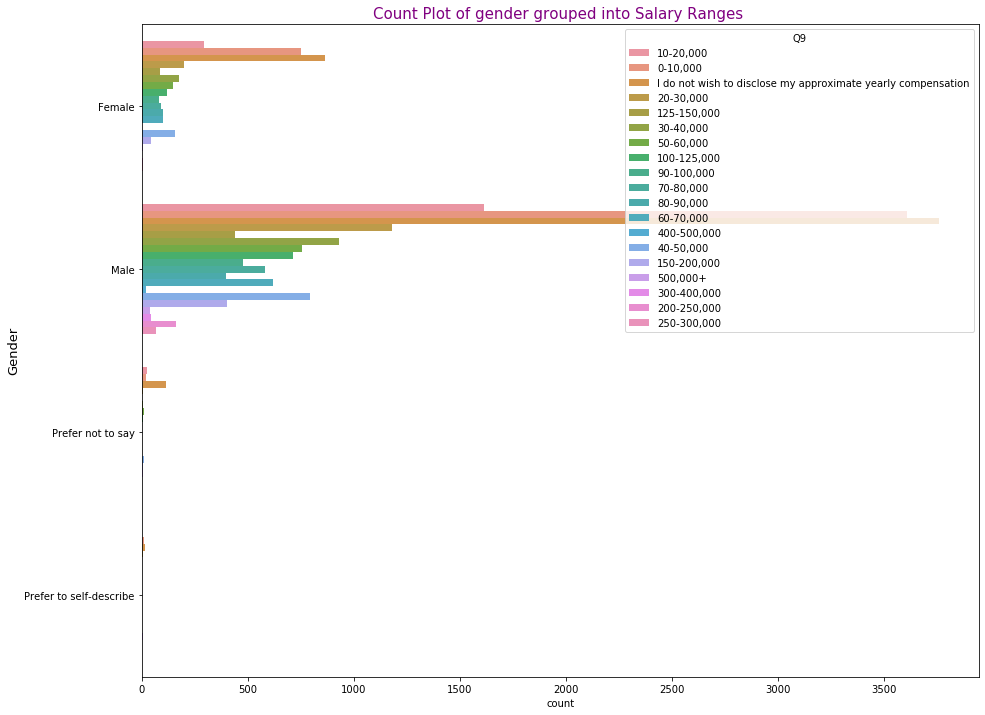

In [6]:
plt.figure(figsize=(15,12))
sb.countplot(y="Q1",hue="Q9",data=df)
plt.title("Count Plot of gender grouped into Salary Ranges ",size=15,color="purple")
plt.ylabel("Gender",size=13)
plt.show()


### We can see from the above plot that Males are huge and there are huge percentage of males as compared to females who have their yearly compensation in all the salary ranges

Text(0, 0.5, 'Age Category')

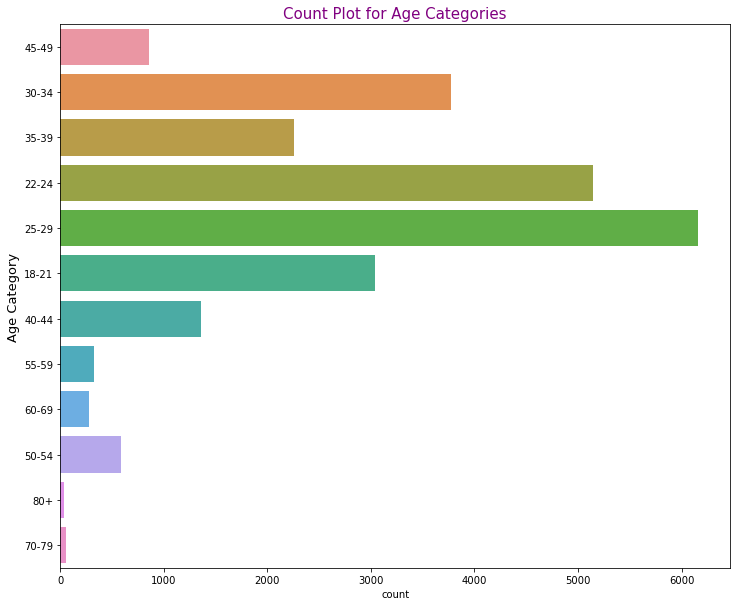

In [7]:
plt.figure(figsize=(12,10))
sb.countplot(y="Q2",data=df)
plt.title("Count Plot for Age Categories",size=15,color="purple")
plt.ylabel("Age Category",size=13)

Text(0, 0.5, 'Country')

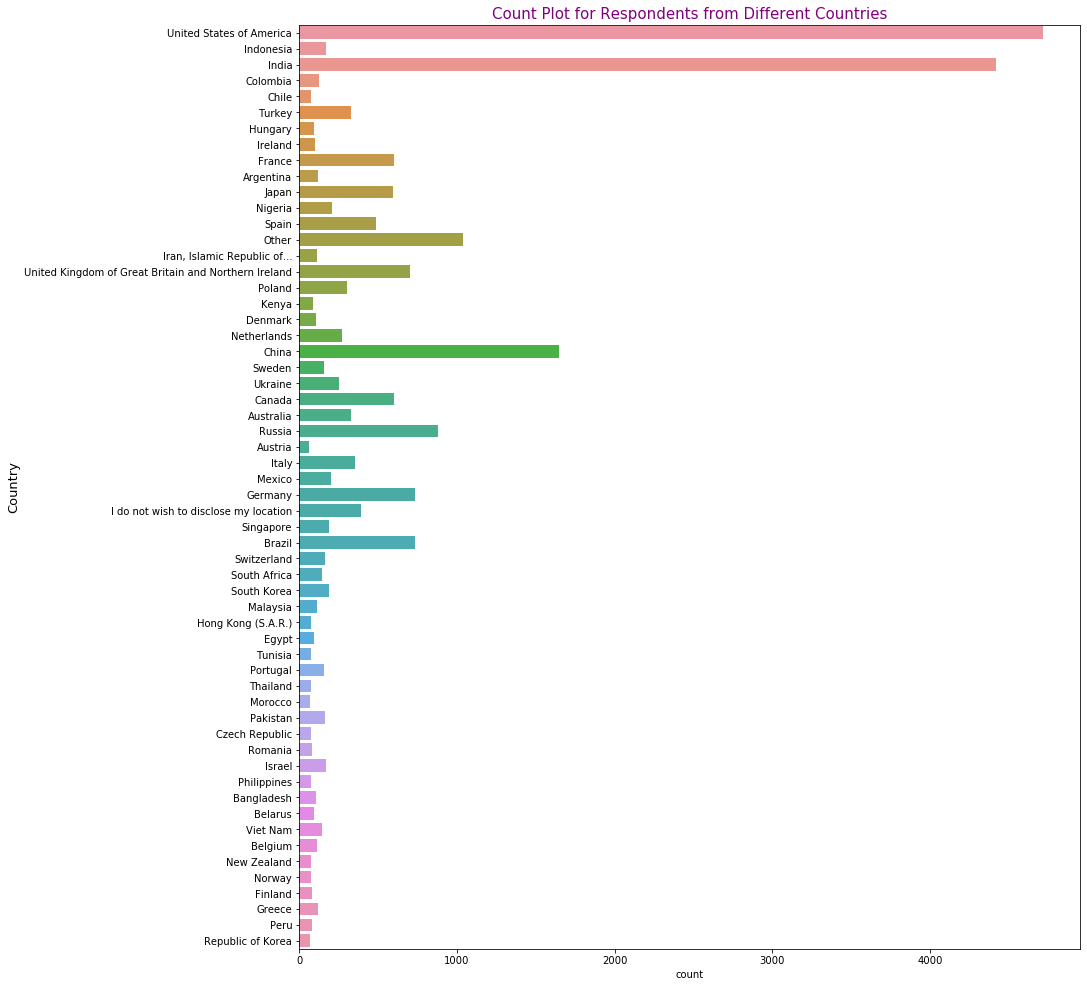

In [8]:
plt.figure(figsize=(14,17))
plt.title("Count Plot for Respondents from Different Countries",size=15,color="purple")
plt.ylabel("Country")
sb.countplot(y="Q3",data=df)
plt.ylabel("Country",size=13)

### We can see from the above plot that highest number of participants in survey are from USA and India

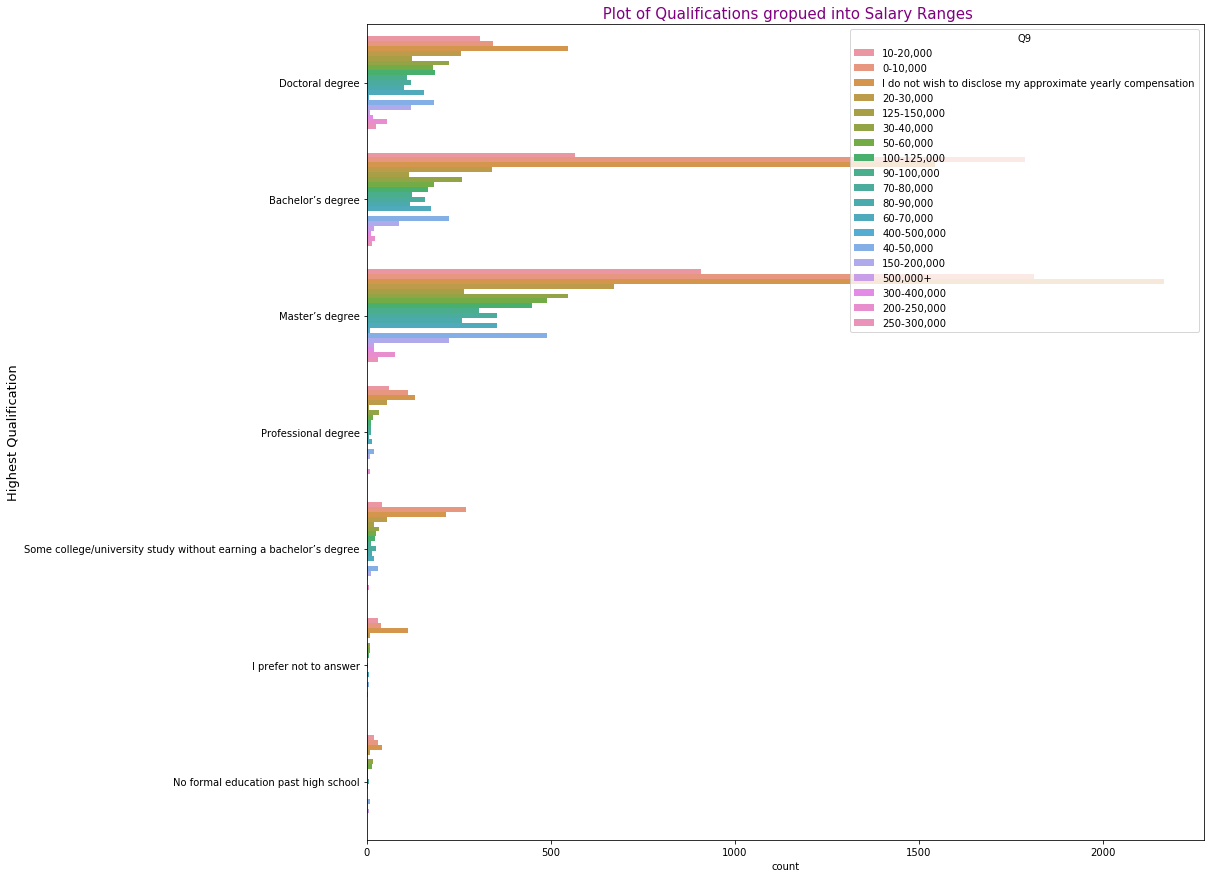

In [9]:
plt.figure(figsize=(15,15))
sb.countplot(y="Q4",hue="Q9",data=df)
plt.title(" Plot of Qualifications gropued into Salary Ranges",size=15,color="purple")
plt.ylabel("Highest Qualification",size=13)
plt.show()

### We can see from the above plot that. People who have Doctorals and Masters degree have higher yearly compenssations as well as compared to bachelors and normal college degree

sb.countplot(y="Q8",data=salaries)

In [10]:
#salaries=salaries[salaries["Q9"]!='I do not wish to disclose my approximate yearly compensation']

Text(0.5, 1.0, 'Count Plot of Job Titles')

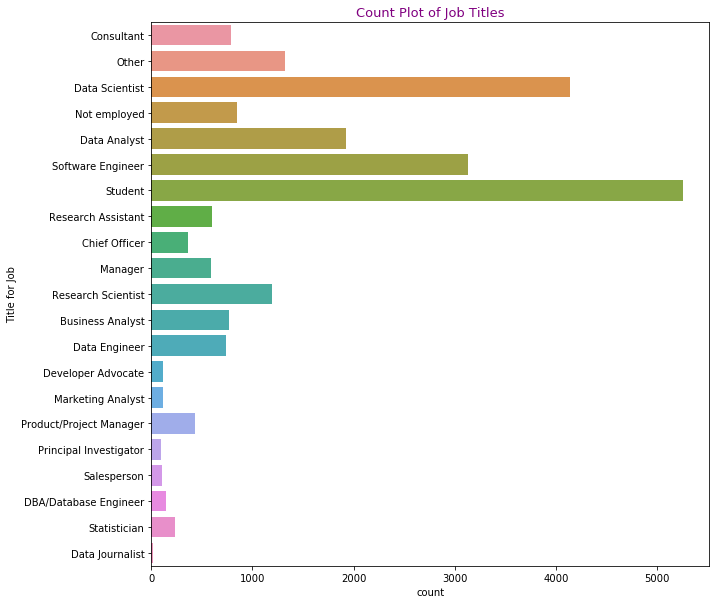

In [11]:
plt.figure(figsize=(10,10))
sb.countplot(y="Q6",data=df)
plt.ylabel("Title for Job")
plt.title("Count Plot of Job Titles",size=13,color="purple")

### Plotting the overall Contribution of each Title by %
### In form of a Pie Chart

Text(0.5, 1.0, "Over-All Contribution of Title's in %")

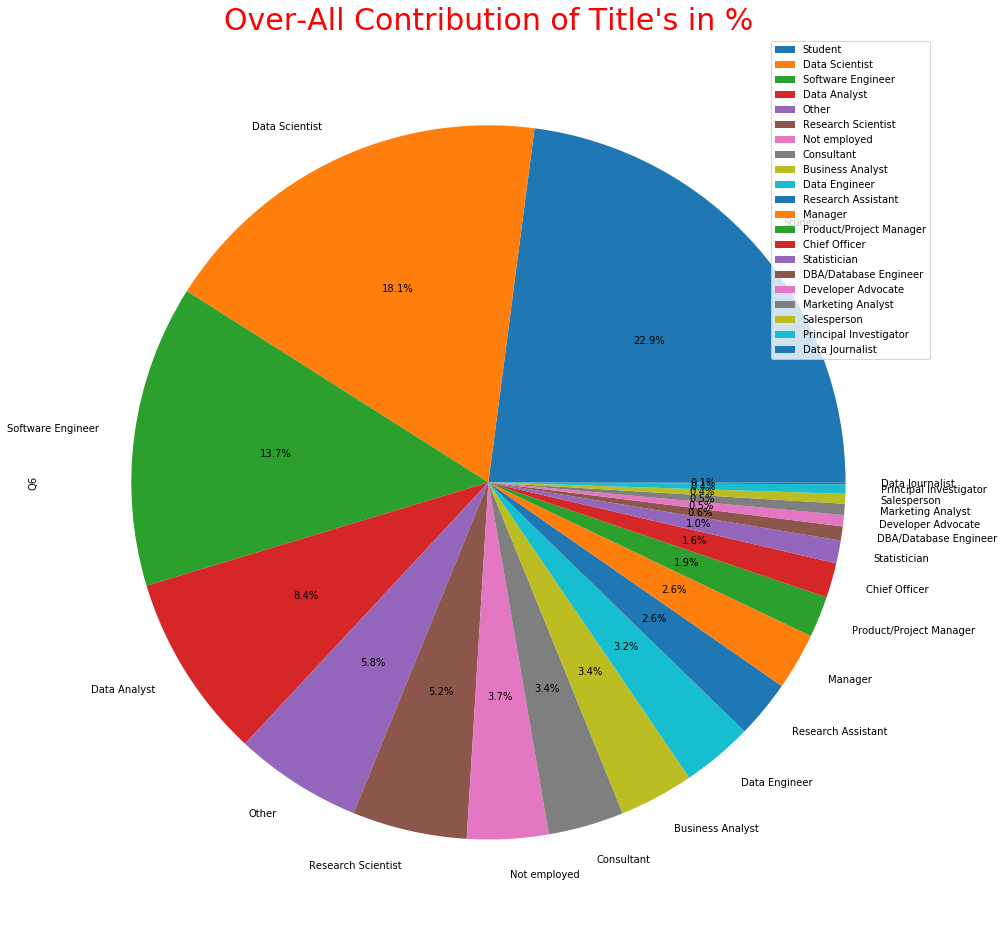

In [12]:
df['Q6'].value_counts().plot(kind='pie',figsize=(16,20),counterclock=True,autopct='%1.1f%%')
plt.legend(loc='best')
plt.title("Over-All Contribution of Title's in %",size=30, color="red")

#### We can also make some coclusion based upon this plot-

Data Science is one of the most attracted field today, peoples from different professions are lmoving towards Data Science i.e. various persons from other fields like Software Engineer, Student, Research Assistant, Chief Officer,Manager,Research Scientist,etc. are moving towards data science as a career option.


## Distribution of Salaries in for of Pie Plot

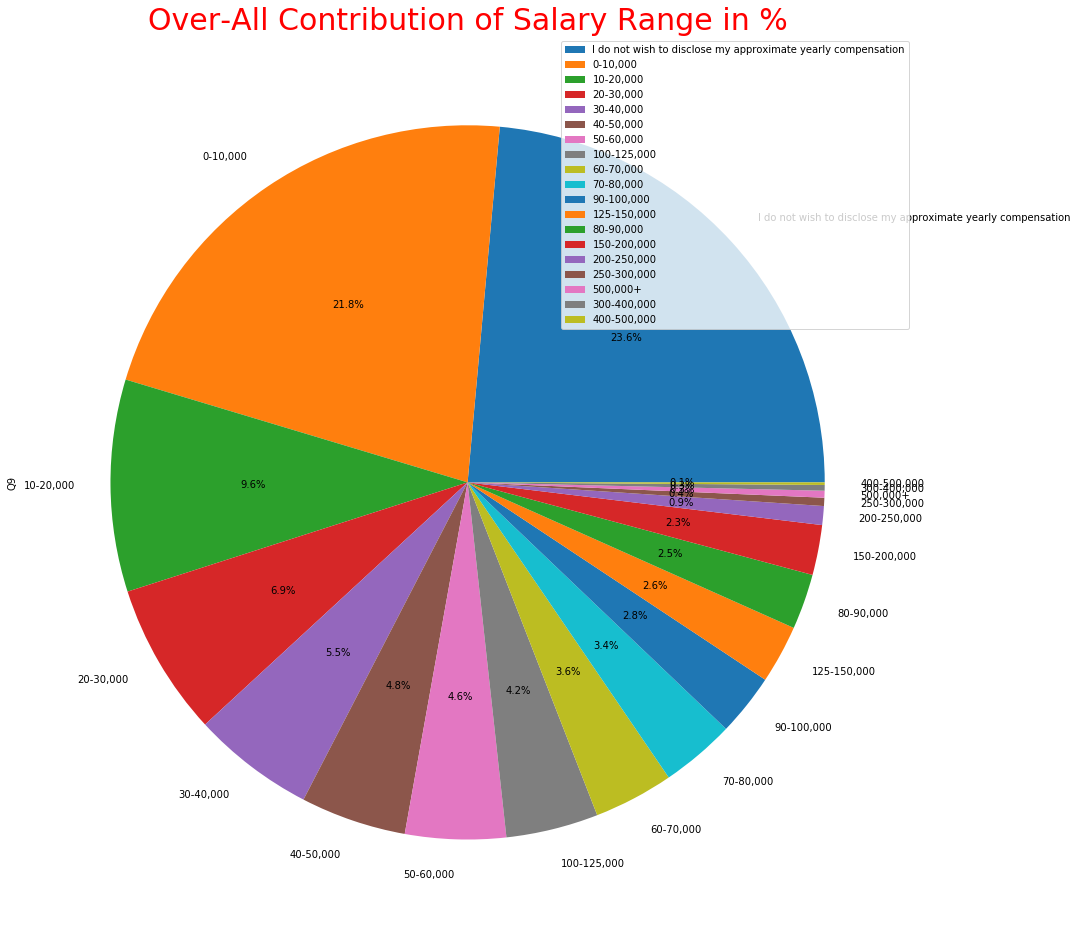

In [13]:
df['Q9'].value_counts().plot(kind='pie',figsize=(16,20),counterclock=True,autopct='%1.1f%%')
plt.legend(loc='best')
plt.title("Over-All Contribution of Salary Range in %",size=30, color="red")
plt.legend(loc='best')

 We can see from the above plot that most of the people have their yearly compensation lying in the range of 0-10,000k. Approximately,21.8% people have their compensation in range of 0-10,000k 

## 1- Data Cleaning

In [14]:

salaries["Q8"].value_counts()

0-1                                                               5898
1-2                                                               3745
2-3                                                               2577
5-10                                                              2524
3-4                                                               1751
10-15                                                             1512
4-5                                                               1488
15-20                                                              854
20-25                                                              384
30 +                                                               197
25-30                                                              171
How many years of experience do you have in your current role?       1
Name: Q8, dtype: int64

In [15]:
salaries.iloc[1:,1].value_counts(normalize=True)
salaries.iloc[1:,1].isnull().value_counts(normalize=True)

False    1.0
Name: Q1, dtype: float64

In [16]:
salaries.iloc[1:,3].value_counts(normalize=True)
salaries.iloc[1:,3].isnull().value_counts(normalize=True)

False    1.0
Name: Q2, dtype: float64

In [17]:
salaries.iloc[1:,4].value_counts(normalize=True)
salaries.iloc[1:,4].isnull().value_counts(normalize=True)


False    1.0
Name: Q3, dtype: float64

###  Dealing with missing values for highest level of education,undergraduate major and title for job

In [18]:
# Looking at the Nan values for the degree column we find that percentage of NAN values are just 1.7% as displayed below. 
by_degree=salaries.iloc[1:,5].value_counts(normalize=True)
print(by_degree)
print(salaries.iloc[1:,5].isnull().value_counts(normalize=True))



#Looking at the Nan values for the undergraduate major column we find that percentage of NAN values are just 1.7% as displayed below. 
by_major=salaries.iloc[1:,6].value_counts(normalize=True)
print(by_major)
print(salaries.iloc[1:,6].isnull().value_counts(normalize=True))




#Looking at the Nan values for the job title  column we find that percentage of NAN values are just 4% as displayed below. 
by_title=salaries.iloc[1:,7].value_counts(normalize=True)
print(by_title)
print(salaries.iloc[1:,7].isnull().value_counts(normalize=True))



Master’s degree                                                      0.463137
Bachelor’s degree                                                    0.302202
Doctoral degree                                                      0.143229
Some college/university study without earning a bachelor’s degree    0.041258
Professional degree                                                  0.025557
I prefer not to answer                                               0.014720
No formal education past high school                                 0.009898
Name: Q4, dtype: float64
False    0.982355
True     0.017645
Name: Q4, dtype: float64
Computer science (software engineering, etc.)                    0.410947
Engineering (non-computer focused)                               0.161459
Mathematics or statistics                                        0.128557
A business discipline (accounting, economics, finance, etc.)     0.078049
Physics or astronomy                                             0.04837

### Hence, Now Since percentages for Nan values are very minimal as compared to the whole dataset hence i decide to drop the rows for for which these columns have MISSING VALUES.

In [19]:
salaries=salaries.dropna(how="any", subset=["Q4","Q5","Q6"])

In [20]:
salaries.shape

(22679, 395)

# Dealing with MISSING VALUES OF SALARY RANGE

In [21]:
salaries.iloc[1:,12].isnull().value_counts(normalize=True)

False    0.882309
True     0.117691
Name: Q9, dtype: float64

In [22]:
a=dict(salaries.iloc[1:,12].value_counts(normalize=True))
print(salaries.iloc[1:,12].value_counts(normalize=True))

I do not wish to disclose my approximate yearly compensation    0.235644
0-10,000                                                        0.218202
10-20,000                                                       0.095807
20-30,000                                                       0.069319
30-40,000                                                       0.055125
40-50,000                                                       0.047729
50-60,000                                                       0.045180
100-125,000                                                     0.041931
60-70,000                                                       0.036384
70-80,000                                                       0.033485
90-100,000                                                      0.028087
125-150,000                                                     0.026538
80-90,000                                                       0.025089
150-200,000                                        

## Drop rows missing target variable

In [23]:
salaries=salaries.dropna(how="any",subset=["Q9"])

In [24]:
salaries=salaries[salaries["Q9"]!="I do not wish to disclose my approximate yearly compensation"]

In [25]:
salaries.loc[1:,'index']=salaries[1:].reset_index().index

In [26]:
salaries.shape

(15295, 396)

### Now i will go through all the columns and decide which columns are to be dropped

###  Dropping so many useless columns

I will be removing several columns that are not important to the regression analysis to determine Salary. Several of the columns are for "OTHER_TEXT". These columns are where the respondent typed in their own answer if they chose "other", however instead of text, this column just gives sequential numbers. These numbers don't give any information or add anything to the analysis so they can be removed. Additionally, Q18, "What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice", has nothing to do with the respondent's salary so it can be removed.

In [27]:
drop_columns = [ 'Q1_OTHER_TEXT', 'Q6_OTHER_TEXT', 'Q7_OTHER_TEXT', 'Q11_OTHER_TEXT', 'Q12_MULTIPLE_CHOICE',
                'Q12_Part_1_TEXT','Q12_Part_2_TEXT','Q12_Part_3_TEXT','Q12_Part_4_TEXT','Q12_Part_5_TEXT','Q12_OTHER_TEXT',
            'Q13_OTHER_TEXT', 'Q14_OTHER_TEXT', 'Q15_OTHER_TEXT', 'Q16_OTHER_TEXT', 'Q17_OTHER_TEXT', 'Q18',
            'Q18_OTHER_TEXT', 'Q19_OTHER_TEXT', 'Q20_OTHER_TEXT', 'Q21_OTHER_TEXT', 'Q22_OTHER_TEXT', 'Q27_OTHER_TEXT', 
            'Q28_OTHER_TEXT', 'Q29_OTHER_TEXT', 'Q30_OTHER_TEXT', 'Q31_OTHER_TEXT','Q32_OTHER', 'Q33_OTHER_TEXT', 'Q34_OTHER_TEXT', 
            'Q35_OTHER_TEXT', 'Q36_OTHER_TEXT', 'Q37_OTHER_TEXT', 'Q38_OTHER_TEXT', 'Q42_OTHER_TEXT', 'Q49_OTHER_TEXT', 
            'Q50_OTHER_TEXT', 'index']
salaries.drop(drop_columns, axis=1, inplace=True)

In [28]:
#salaries.drop(['Unnamed: 0'],axis=1,inplace=True)

In [29]:
salaries.shape


(15295, 358)

### Renaming the columns with their original Names

In [30]:
salaries=salaries.rename(columns={'Time from Start to Finish (seconds)' : 'D',"Q1":"Gender","Q2":"Age",
                                  "Q3":"Country","Q4":"Education","Q5":"Major","Q6":"Title","Q7":"Industry",
                                  "Q8":"Experience","Q9":"Salary"})

In [31]:
salaries=salaries.drop([0],axis=0)

####   Since it is a pretty big survey so anyone who took less than 600 seconds to fill it is dropped because he has a lot of missing values  

In [32]:

salaries=salaries[salaries["D"].astype(int)>600]


####  There are some people who took more than 4 hours thats is = 14400seconds, they might have just openend the survey tab and forgot to finish it so i will elimate these rows as well.

In [33]:
salaries=salaries[salaries["D"].astype(int)<15000]

In [34]:
salaries.shape

(11204, 358)

####   Since duration has nothing to do with the salary so i will drop time column also

In [35]:
salaries=salaries.drop(["D"],axis=1)

In [36]:
salaries.shape

(11204, 357)

In [37]:
salaries.iloc[2,:].isnull().value_counts(normalize=True)

True     0.820728
False    0.179272
Name: 7, dtype: float64

### Any Columns which have more than 90% of NAN values are of no use for our analysis, because they will not give any meaningful results.
#### Hence these columns are dropped.

In [38]:
salaries=salaries.dropna(thresh=1090,axis=1)

In [39]:
salaries.shape

(11204, 176)

### Any Rows which have more than 90% of NAN values are of no use for our analysis, because they will not give any meaningful results.
####  Hence theses Rows are dropped.

In [40]:
salaries=salaries.dropna(thresh=36,axis=0)

In [41]:
salaries.shape

(10424, 176)

###  Since students are not a good choice to predict the salaries of the data scientist because they have not entered the industry yet, Hence title columns which has rows as "Student" is being dropped and also for Industry column which has rows as "I am a student" is also being dropped.   

In [42]:
salaries["Title"].value_counts()

Data Scientist             2461
Student                    1533
Software Engineer          1487
Data Analyst                983
Research Scientist          671
Other                       653
Consultant                  400
Data Engineer               394
Business Analyst            388
Manager                     321
Research Assistant          300
Product/Project Manager     238
Chief Officer               178
Statistician                127
DBA/Database Engineer        82
Principal Investigator       64
Marketing Analyst            51
Developer Advocate           46
Salesperson                  42
Data Journalist               5
Name: Title, dtype: int64

In [43]:
salaries=salaries[salaries["Title"]!="Student"]

In [44]:
salaries=salaries[salaries["Industry"]!="I am a student"]

In [45]:
salaries.shape

(8646, 176)

### ALso, most of the missing values for experience are because the it is a student or just started their career. Since there are very few of these, it is safe to drop these respondents from the analysis.

In [46]:
salaries["Experience"].isnull().value_counts()

False    8641
True        5
Name: Experience, dtype: int64

In [47]:
salaries=salaries.dropna(subset=["Experience"])

In [48]:
salaries.shape

(8641, 176)

In [49]:
small_countries=salaries["Country"].value_counts()
small_countries<30

United States of America                                False
India                                                   False
Other                                                   False
Russia                                                  False
Brazil                                                  False
United Kingdom of Great Britain and Northern Ireland    False
Germany                                                 False
China                                                   False
Canada                                                  False
France                                                  False
Japan                                                   False
Spain                                                   False
Australia                                               False
Poland                                                  False
Italy                                                   False
Netherlands                                             False
Turkey  

###  So the countries which have less than 30 responses in the whole dataset can  dropped because this is not enough to predict the salary of the data scientists. Hence removing these negligible respondents from these countries will have no effect on the whole dataset.

In [50]:
bo=salaries["Country"].isin(["Thailand","Egypt","Austria","Bangladesh","Republic of Korea","Morocco","Tunisia","Hong Kong (S.A.R)"])
original_index=salaries[bo].index
original_index

Int64Index([  918,   948,   953,   958,  1052,  1134,  1174,  1326,  1345,
             1429,
            ...
            21445, 21579, 21796, 21895, 22039, 22423, 23127, 23229, 23232,
            23248],
           dtype='int64', length=133)

In [51]:
salaries=salaries.drop(original_index,axis=0)
salaries.shape


(8508, 176)

In [52]:
salaries.head()

,Gender,Age,Country,Education,Major,Title,Industry,Experience,Salary,Q10,...,Q49_Part_6,Q49_Part_7,Q49_Part_8,Q49_Part_9,Q49_Part_10,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_7
7,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,"10-20,000",No (we do not use ML methods),...,NaN,NaN,Define all random seeds,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,"0-10,000","We recently started using ML methods (i.e., mo...",...,Make sure the code is well documented,Make sure the code is human-readable,NaN,Define relative rather than absolute file paths,NaN,NaN,NaN,NaN,Not enough incentives to share my work,NaN
10,Male,30-34,Hungary,Master’s degree,Engineering (non-computer focused),Software Engineer,Online Service/Internet-based Services,3-4,"20-30,000","We have well established ML methods (i.e., mod...",...,Make sure the code is well documented,Make sure the code is human-readable,Define all random seeds,NaN,Include a text file describing all dependencies,Too time-consuming,NaN,Afraid that others will use my work without gi...,NaN,NaN
12,Male,40-44,United States of America,Master’s degree,Engineering (non-computer focused),Data Scientist,Other,5-10,"125-150,000","We recently started using ML methods (i.e., mo...",...,Make sure the code is well documented,Make sure the code is human-readable,Define all random seeds,NaN,Include a text file describing all dependencies,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN
14,Male,25-29,United States of America,Bachelor’s degree,Mathematics or statistics,Research Assistant,Academics/Education,1-2,"30-40,000",We are exploring ML methods (and may one day p...,...,Make sure the code is well documented,Make sure the code is human-readable,NaN,NaN,Include a text file describing all dependencies,Too time-consuming,NaN,NaN,NaN,NaN


In [53]:
salaries.shape


(8508, 176)

## Filling in the missing values

#### Heat Map have been plotted to out which feature have the most number of missing values

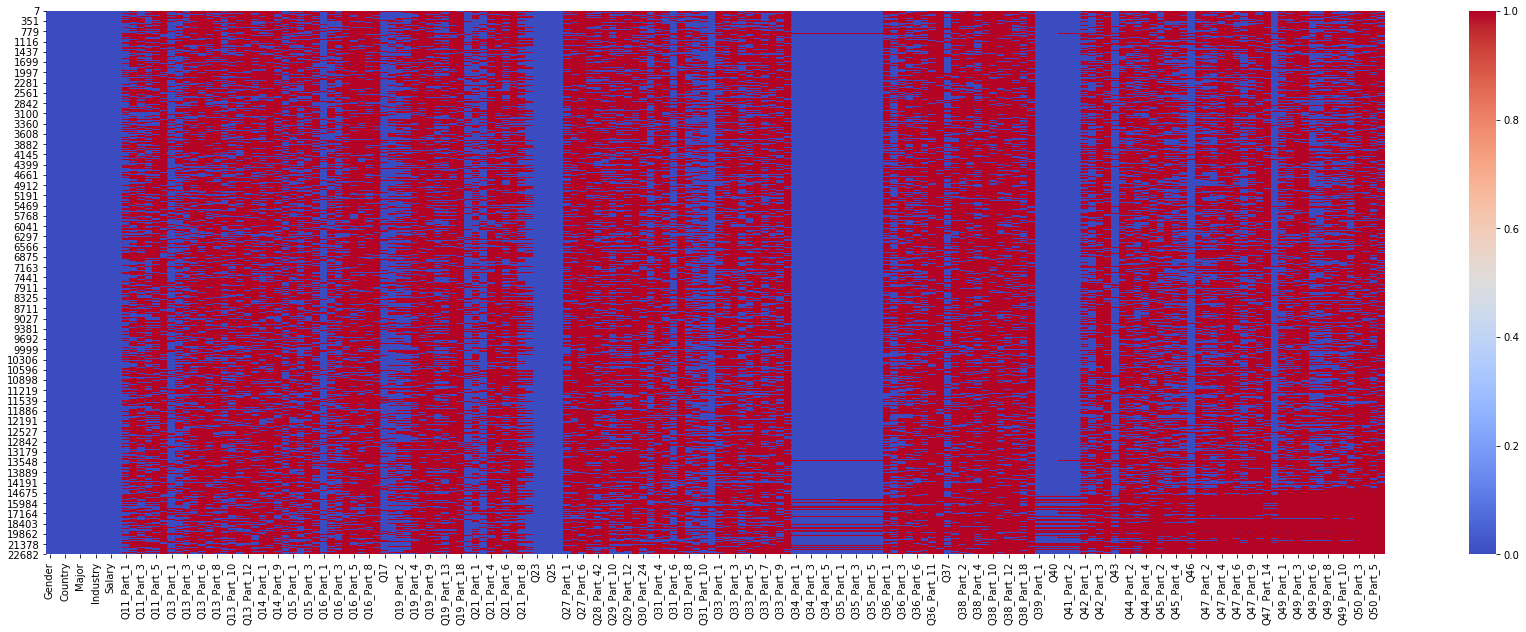

In [54]:
fig,ax = plt.subplots(figsize=(30,10))
sb.heatmap(salaries.isnull(),cmap="coolwarm")


###  Engineering feature for Q16 shows basic outline
### Q16 says which programming languages you you on a regular basis. So i am eliminating all the Q16 parts and engineering a new feature telling that how many of the languages each person uses.

More number of languages used by a person means better score for that person.

In [55]:
#Q16=salaries.filter(regex='Q16')
#Q16

In [56]:
#salaries.iloc[:,50:70]
#Q16=salaries.filter(regex='Q16')

#Q16
#Q16["Q16NEW"]=Q16.apply(lambda x: x.count(),axis=1)
#Q16
#Q16=Q16.drop(["Q16_Part_1","Q16_Part_2","Q16_Part_3","Q16_Part_4","Q16_Part_5","Q16_Part_6","Q16_Part_9","Q16_Part_8"],axis=1)

In [57]:
#Q16

In [58]:
#salaries["Q16new"]=Q16
#salaries=salaries.drop(["Q16_Part_1","Q16_Part_2","Q16_Part_3","Q16_Part_4","Q16_Part_5","Q16_Part_6","Q16_Part_9","Q16_Part_8"],axis=1)



## Feature Selection, Feature Engineering and Label Encoding Applied in loop for MCQ questions 


### The above shown engineering can be done for many questions of this type so now i will create a function to this task.#

In [59]:
salaries.shape


(8508, 176)

### Function eng_features has been created for these set of questions. 

Suppose, Engineering feature for Q16 shows basic outline above.
Q16 says which programming languages you you on a regular basis. 
So i am eliminating all the Q16 parts and engineering a new feature telling that how many of the languages each person uses.
More number of languages used by a person means better score for that person.

In [60]:
def eng_features(df):
    for i in ['Q11','Q13','Q14','Q15','Q16','Q19','Q21','Q27','Q28','Q29','Q30','Q31','Q33','Q36','Q38','Q42','Q44','Q45','Q47','Q49','Q50']:
        df1=df.filter(regex=i)
        df_sum=df1.apply(lambda x: x.count(), axis=1)
        df[i]=df_sum
    return df


        

In [61]:
salaries=eng_features(salaries)

In [62]:
salaries.head()

,Gender,Age,Country,Education,Major,Title,Industry,Experience,Salary,Q10,...,Q31,Q33,Q36,Q38,Q42,Q44,Q45,Q47,Q49,Q50
7,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,"10-20,000",No (we do not use ML methods),...,3,1,1,1,1,1,1,1,4,0
8,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,"0-10,000","We recently started using ML methods (i.e., mo...",...,4,2,3,4,2,1,3,1,4,1
10,Male,30-34,Hungary,Master’s degree,Engineering (non-computer focused),Software Engineer,Online Service/Internet-based Services,3-4,"20-30,000","We have well established ML methods (i.e., mod...",...,4,4,1,1,1,1,2,4,5,2
12,Male,40-44,United States of America,Master’s degree,Engineering (non-computer focused),Data Scientist,Other,5-10,"125-150,000","We recently started using ML methods (i.e., mo...",...,1,1,3,1,0,1,0,1,5,2
14,Male,25-29,United States of America,Bachelor’s degree,Mathematics or statistics,Research Assistant,Academics/Education,1-2,"30-40,000",We are exploring ML methods (and may one day p...,...,3,3,1,3,2,2,3,4,5,1


#### Another fuction drop_features has been created to drop all those previous features after the new engineered feature have been created for those set of questions.

In [63]:
def drop_features(df):
    for i in ['Q11_Part','Q13_Part','Q14_Part','Q15_Part','Q16_Part','Q19_Part','Q21_Part','Q27_Part','Q28_Part','Q29_Part',
              'Q30_Part','Q31_Part','Q33_Part','Q36_Part','Q38_Part','Q42_Part','Q44_Part','Q45_Part','Q47_Part','Q49_Part','Q50_Part']:
        df1=df.filter(regex=i)
        df=df.drop(df1.columns,axis=1)
    return df   

In [64]:
salaries= drop_features(salaries)
salaries

,Gender,Age,Country,Education,Major,Title,Industry,Experience,Salary,Q10,...,Q31,Q33,Q36,Q38,Q42,Q44,Q45,Q47,Q49,Q50
7,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,"10-20,000",No (we do not use ML methods),...,3,1,1,1,1,1,1,1,4,0
8,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,"0-10,000","We recently started using ML methods (i.e., mo...",...,4,2,3,4,2,1,3,1,4,1
10,Male,30-34,Hungary,Master’s degree,Engineering (non-computer focused),Software Engineer,Online Service/Internet-based Services,3-4,"20-30,000","We have well established ML methods (i.e., mod...",...,4,4,1,1,1,1,2,4,5,2
12,Male,40-44,United States of America,Master’s degree,Engineering (non-computer focused),Data Scientist,Other,5-10,"125-150,000","We recently started using ML methods (i.e., mo...",...,1,1,3,1,0,1,0,1,5,2
14,Male,25-29,United States of America,Bachelor’s degree,Mathematics or statistics,Research Assistant,Academics/Education,1-2,"30-40,000",We are exploring ML methods (and may one day p...,...,3,3,1,3,2,2,3,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23823,Male,25-29,Pakistan,Bachelor’s degree,"Computer science (software engineering, etc.)",Software Engineer,Computers/Technology,1-2,"0-10,000",We are exploring ML methods (and may one day p...,...,4,3,2,3,1,1,0,0,0,0
23824,Male,35-39,United Kingdom of Great Britain and Northern I...,Doctoral degree,"Computer science (software engineering, etc.)",Research Scientist,Academics/Education,10-15,"70-80,000",No (we do not use ML methods),...,6,1,1,4,1,1,1,3,6,3
23833,Male,18-21,Turkey,Bachelor’s degree,Mathematics or statistics,Data Engineer,Insurance/Risk Assessment,0-1,"0-10,000","We recently started using ML methods (i.e., mo...",...,1,7,0,0,0,0,0,0,0,0
23836,Male,25-29,Russia,Master’s degree,"Computer science (software engineering, etc.)",Product/Project Manager,Shipping/Transportation,2-3,"10-20,000",We are exploring ML methods (and may one day p...,...,1,1,1,1,0,0,0,0,0,0


##  Label Encoding

Label encoding converts each category in the specified columns into a value between 0 and n - 1, where n is the number of categories. Note that the dtype must be category.

Pros:

1-very quick to run

2-extremely easy method to encode your labels

3-does not create additional columns in your dataframe


Cons:

1-gives different weight to labels, without knowing the meaning of the labels

2-difficult to interpret encoding results i.e. what is the corresponding categorical value for each numerical value given in the 

3- feature column

### Now i will be replacing all the cateogarical and text values in columns of Age, Education, Experience ,Q10 ,Q23, Q24,Q25, Q26, Q48, Q41_Part_1, Q41_Part_2, Q41_Part_3, Q39_Part_1, Q39_Part_2. These questions have answers which can be grouped according to various scores hence i am label encoding these.

In [73]:
salaries.Age.value_counts()


25-29    2448
30-34    1840
22-24    1161
35-39    1129
40-44     670
45-49     428
50-54     302
18-21     190
55-59     175
60-69     141
70-79      17
80+         7
Name: Age, dtype: int64

In [74]:
salaries.Q48

7           I do not know; I have no opinion on the matter
8        I view ML models as "black boxes" but I am con...
10       I am confident that I can understand and expla...
12       I am confident that I can understand and expla...
14       I view ML models as "black boxes" but I am con...
                               ...                        
23823                                                  NaN
23824    I am confident that I can explain the outputs ...
23833                                                  NaN
23836                                                  NaN
23844                                                  NaN
Name: Q48, Length: 8508, dtype: object

In [75]:
salaries.Q43.value_counts()

0         2113
0-10      1779
10-20     1142
20-30      790
30-40      338
40-50      314
50-60      176
60-70      144
90-100     125
70-80      121
80-90       60
Name: Q43, dtype: int64

In [76]:
salaries.Q46.value_counts()


10-20     1191
0-10      1090
20-30     1009
0          748
90-100     682
30-40      551
40-50      518
70-80      422
50-60      368
60-70      363
80-90      276
Name: Q46, dtype: int64

In [77]:
# Q23
salaries.Q23.value_counts()

50% to 74% of my time    2601
25% to 49% of my time    2247
1% to 25% of my time     1815
75% to 99% of my time    1498
100% of my time           218
0% of my time             129
Name: Q23, dtype: int64

In [78]:
# Q24
salaries.Q24.value_counts()

1-2 years                                               2289
3-5 years                                               2241
< 1 year                                                1479
5-10 years                                              1390
10-20 years                                              755
20-30 years                                              205
30-40 years                                               68
I have never written code but I want to learn             49
40+ years                                                 30
I have never written code and I do not want to learn       1
Name: Q24, dtype: int64

In [79]:
salaries.Q25.value_counts()

1-2 years                                                                2311
< 1 year                                                                 2278
2-3 years                                                                1204
3-4 years                                                                 693
5-10 years                                                                614
I have never studied machine learning but plan to learn in the future     545
4-5 years                                                                 527
10-15 years                                                               216
20+ years                                                                 103
I have never studied machine learning and I do not plan to                 16
Name: Q25, dtype: int64

#### Label Encoding has been done by creating a new dictionary for those questions and replacing the data frame with the encoded values obtained by this dictionary

In [80]:
import random
new_dict = {'Experience': {'0-1': 0.5, '1-2': 1.5, '2-3': 3.5, '3-4': 3.5, '4-5': 4.5, '5-10': 7.5, '10-15': 12.5, 
                            '15-20': 17.5, '20-25': 22.5, '25-30': 27.5, '30 +': 35},
            'Age':{'25-29':27, '30-34':32, '22-24':23, '35-39':37, '40-44':42, '45-49':47, '50-54':52, '18-21':20, '55-59':57, '60-69':65, '70-79':75, '80+':80 },
            
                          
          'Education': {'Doctoral degree': 7, 'Master’s degree': 5, 'Bachelor’s degree': 4, 'Professional degree': 3,
                        'Some college/university study without earning a bachelor’s degree': 2,
                        'No formal education past high school': 1, 'I prefer not to answer': 0
                       },
            
            
            'Q23':{'50% to 74% of my time': random.randint(50,74), '25% to 49% of my time': random.randint(25,49), '1% to 25% of my time': random.randint(1,25),
                   '75% to 99% of my time': random.randint(75,99), '100% of my time': 100, '0% of my time': 0
                
            },
            
            'Q24':{'1-2 years':1.5, '3-5 years': 4, '< 1 year': 0.5,'5-10 years': random.randint(5,10), '10-20 years': random.randint(10,20),
                   '20-30 years': random.randint(20,30), 'I have never written code but I want to learn': 0.5, '30-40 years': random.randint(30,40),
                   '40+ years': 40, 'I have never written code and I do not want to learn': 0
                
            },
            
            'Q25':{'1-2 years':1.5, '2-3 years': 2.5, '< 1 year': 1,'3-4 years': 3.5, '5-10 years': random.randint(5,10),
                   '4-5 years': 4.5, 'I have never studied machine learning but plan to learn in the future': 0.5, '10-15 years': random.randint(10,15),
                   '20+ years': 20, 'I have never studied machine learning and I do not plan to': 0
                
            },
            
         
          'Q10': {'I do not know': 0, 'No (we do not use ML methods)': 1,
                  'We are exploring ML methods (and may one day put a model into production)': 2,
                  'We use ML methods for generating insights (but do not put working models into production)': 3,
                  'We recently started using ML methods (i.e., models in production for less than 2 years)': 4,
                  'We have well established ML methods (i.e., models in production for more than 2 years)': 5
                 },
          'Q26': {'Definitely not': 1, 'Probably not': 2, 'Maybe': 3, 'Probably yes': 4, 'Definitely yes': 5
                 },
          'Q48': {'I do not know; I have no opinion on the matter': 0, 'Yes, most ML models are "black boxes"': 1,
                  'I view ML models as "black boxes" but I am confident that experts are able to explain model outputs': 2,
                  'I am confident that I can understand and explain the outputs of many but not all ML models': 3,
                  'I am confident that I can explain the outputs of most if not all ML models': 4
                 },
          'Q39_Part_1': {'No opinion; I do not know': 0, 'Much worse': 1, 'Slightly worse': 2,
                        'Neither better nor worse': 3, 'Slightly better': 4, 'Much better': 5
                        },
          'Q39_Part_2': {'No opinion; I do not know': 0, 'Much worse': 1, 'Slightly worse': 2,
                        'Neither better nor worse': 3, 'Slightly better': 4, 'Much better': 5
                        },
          'Q41_Part_1': {'No opinion; I do not know': 0, 'Not at all important': 1, 'Slightly important': 2,
                        'Very important': 3
                        },
          'Q41_Part_2': {'No opinion; I do not know': 0, 'Not at all important': 1, 'Slightly important': 2,
                        'Very important': 3
                        },
          'Q41_Part_3': {'No opinion; I do not know': 0, 'Not at all important': 1, 'Slightly important': 2,
                        'Very important': 3
                        },
            
            'Q43':      {'0':0, '0-10':random.randint(0,10), '10-20':random.randint(10,20),'20-30':random.randint(20,30),
                         '30-40':random.randint(30,40),'40-50':random.randint(40,50),'50-60':random.randint(50,60),'60-70':random.randint(60,70),
                         '70-80':random.randint(70,80),'80-90':random.randint(80,90),'90-100':random.randint(90,100)
                         },
            'Q46':      {'0':0, '0-10':random.randint(0,10), '10-20':random.randint(10,20),'20-30':random.randint(20,30),
                         '30-40':random.randint(30,40),'40-50':random.randint(40,50),'50-60':random.randint(50,60),'60-70':random.randint(60,70),
                         '70-80':random.randint(70,80),'80-90':random.randint(80,90),'90-100':random.randint(90,100)
                         }
            }
           
           
           
           
           
           
salaries.replace(new_dict, inplace=True)        
           
           
          

In [81]:
salaries.head()

,Gender,Age,Country,Education,Major,Title,Industry,Experience,Salary,Q10,...,Q31,Q33,Q36,Q38,Q42,Q44,Q45,Q47,Q49,Q50
7,Male,37,Chile,7,"Information technology, networking, or system ...",Other,Academics/Education,12.5,"10-20,000",1,...,3,1,1,1,1,1,1,1,4,0
8,Male,20,India,5,"Information technology, networking, or system ...",Other,Other,0.5,"0-10,000",4,...,4,2,3,4,2,1,3,1,4,1
10,Male,32,Hungary,5,Engineering (non-computer focused),Software Engineer,Online Service/Internet-based Services,3.5,"20-30,000",5,...,4,4,1,1,1,1,2,4,5,2
12,Male,42,United States of America,5,Engineering (non-computer focused),Data Scientist,Other,7.5,"125-150,000",4,...,1,1,3,1,0,1,0,1,5,2
14,Male,27,United States of America,4,Mathematics or statistics,Research Assistant,Academics/Education,1.5,"30-40,000",2,...,3,3,1,3,2,2,3,4,5,1


###   Now i will covert the some of the categorical variables with the help of label encoding

### Title

In [82]:
salaries['Title']=salaries["Title"].astype('category')
salaries['Title']=salaries['Title'].cat.codes


### Same thing will be done for Major, Industry, Q40, Gender

In [83]:
salaries['Major']=salaries["Major"].astype('category')
salaries['Major']=salaries['Major'].cat.codes

salaries['Industry']=salaries["Industry"].astype('category')
salaries['Industry']=salaries['Industry'].cat.codes

salaries['Q40']=salaries["Q40"].astype('category')
salaries['Q40']=salaries['Q40'].cat.codes

salaries['Gender']=salaries["Gender"].astype('category')
salaries['Gender']=salaries['Gender'].cat.codes

In [84]:
salaries.Gender.value_counts()

1    7228
0    1191
2      61
3      28
Name: Gender, dtype: int64

In [85]:
salaries.shape

(8508, 61)

In [86]:
salaries.to_csv('Initial_cleaned.csv')

## One Hot Encodiing 

This encoding method creates a new column for each label and then assigns a dummy variable, either 0 or 1, to the row. This type of encoding is useful when there are only a few labels for the category.

For example, gender is a neutral label when it comes to salary, so we do not want to use label encoding. Therefore, one-hot encoding is the most appropriate.

Pros:

1-fast

2-very easy to implement

3-only assigns 1 or 0, so it does not give weight to specific labels

Cons:

1-creates more columns

2-higher number of features for the regression algorithms to handle


### For Q17, Q20, Q22, Q32, Q37

### Since these set of questions are for example" Which programming language do you use most often? so anwers are specific programming languages
and i cannot assign scores to that. So it better to use one hot ecoding for this case, since it will  create a new column for each programming
language and assign a variable 1  if that person has used that programming language or else 0.



In [87]:
salaries=pd.get_dummies(salaries,columns=["Q17", "Q20", "Q22", "Q32", "Q37"])

In [88]:
salaries.shape

(8508, 127)

### Encoding for the country section is done here.

In [89]:
 country=dict(round(salaries.Country.value_counts(),4))

In [90]:
country_plt=country
country

{'United States of America': 2006,
 'India': 1111,
 'Other': 399,
 'Russia': 341,
 'Brazil': 335,
 'United Kingdom of Great Britain and Northern Ireland': 335,
 'Germany': 301,
 'China': 274,
 'Canada': 261,
 'France': 248,
 'Japan': 226,
 'Spain': 216,
 'Australia': 155,
 'Poland': 149,
 'Italy': 140,
 'Netherlands': 128,
 'Turkey': 112,
 'Ukraine': 101,
 'Mexico': 100,
 'Sweden': 91,
 'Israel': 87,
 'Singapore': 78,
 'South Africa': 74,
 'I do not wish to disclose my location': 69,
 'Portugal': 65,
 'Switzerland': 63,
 'Colombia': 61,
 'Argentina': 59,
 'South Korea': 55,
 'Indonesia': 52,
 'Viet Nam': 51,
 'Pakistan': 50,
 'Denmark': 50,
 'Belgium': 50,
 'Greece': 47,
 'Ireland': 46,
 'Nigeria': 46,
 'Hungary': 43,
 'Finland': 39,
 'Chile': 38,
 'Norway': 38,
 'Romania': 37,
 'New Zealand': 36,
 'Malaysia': 35,
 'Belarus': 33,
 'Czech Republic': 31,
 'Kenya': 30,
 'Peru': 30,
 'Iran, Islamic Republic of...': 30,
 'Philippines': 29,
 'Hong Kong (S.A.R.)': 27}

In [91]:
salaries.replace(country,inplace=True)

## Now i will do label encoding for salaries
### Salaries have been replaced by the meamn value for their respective ranges

In [85]:
salaries.shape

(8508, 127)

In [86]:
salary={'Salary':{'0-10,000':5000,'10-20,000':15000,'20-30,000':25000,'30-40,000':35000,'40-50,000':45000,'50-60,000':55000,
                  '60-70,000':65000,'70-80,000':75000,'80-90,000':85000,'90-100,000':95000,'100-125,000':113000,'125-150,000':137000,
                  '150-200,000':175000,'200-250,000':225000,'250-300,000':275000,'300-400,000':350000,'400-500,000':450000,'500,000+':500000,
    
}
    
}
salaries.replace(salary, inplace=True)

In [87]:
salaries.Salary.value_counts()

5000      1315
15000     1050
25000      833
35000      693
45000      658
55000      628
113000     601
65000      516
75000      468
95000      407
137000     406
85000      348
175000     335
225000     125
275000      55
350000      29
500000      28
450000      13
Name: Salary, dtype: int64

In [88]:
salaries.Salary.value_counts()

5000      1315
15000     1050
25000      833
35000      693
45000      658
55000      628
113000     601
65000      516
75000      468
95000      407
137000     406
85000      348
175000     335
225000     125
275000      55
350000      29
500000      28
450000      13
Name: Salary, dtype: int64

In [89]:
#from sklearn import preprocessing


#le=preprocessing.LabelEncoder()

#le.fit(salaries.Salary)

#le.classes_

#salaries.Salary=le.transform(salaries.Salary)

In [90]:
salaries.Q25.value_counts()

1.5     2311
1.0     2278
2.5     1204
3.5      693
5.0      614
0.5      545
4.5      527
14.0     216
20.0     103
0.0       16
Name: Q25, dtype: int64

In [91]:
salaries.to_csv(" Encoded.csv")

In [92]:
salaries.shape
salaries.Q24.isnull().value_counts()

False    8507
True        1
Name: Q24, dtype: int64

In [93]:
salaries.Q25.isnull().value_counts()

False    8507
True        1
Name: Q25, dtype: int64

In [94]:
salaries.dropna(subset=["Q24","Q25"])

,Gender,Age,Country,Education,Major,Title,Industry,Experience,Salary,Q10,...,Q37_DataQuest,Q37_Fast.AI,Q37_Kaggle Learn,Q37_Online University Courses,Q37_Other,Q37_TheSchool.AI,Q37_Udacity,Q37_Udemy,Q37_developers.google.com,Q37_edX
7,1,37,38,7,7,11,0,12.5,15000,1,...,0,0,0,0,0,0,0,0,0,0
8,1,20,1111,5,7,11,15,0.5,5000,4,...,0,0,0,0,0,0,1,0,0,0
10,1,32,43,5,2,17,14,3.5,25000,5,...,0,0,0,0,0,0,0,0,0,0
12,1,42,2006,5,2,7,15,7.5,137000,4,...,0,0,0,0,0,0,1,0,0,0
14,1,27,2006,4,8,14,0,1.5,35000,2,...,0,0,0,0,0,0,0,0,0,0
15,0,27,59,4,0,4,15,1.5,15000,5,...,0,0,0,0,0,0,0,0,0,0
16,1,27,226,5,2,7,10,0.5,35000,3,...,0,0,0,0,0,0,0,0,0,0
17,1,42,61,5,3,7,4,1.5,55000,2,...,0,0,0,0,0,0,0,0,0,0
18,1,27,46,3,9,11,16,3.5,5000,1,...,0,0,0,0,0,0,0,0,0,1
19,1,37,2006,2,1,11,11,7.5,113000,1,...,0,0,0,0,0,0,0,0,0,0


In [95]:
salaries.Q24.isnull().value_counts()


False    8507
True        1
Name: Q24, dtype: int64

In [96]:
salaries.shape

(8508, 127)

## Finding feature which still have missing values

In [97]:
salaries.columns[salaries.isnull().any()]


Index(['Q24', 'Q25', 'Q26', 'Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3',
       'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6', 'Q35_Part_1', 'Q35_Part_2',
       'Q35_Part_3', 'Q35_Part_4', 'Q35_Part_5', 'Q35_Part_6', 'Q39_Part_1',
       'Q39_Part_2', 'Q41_Part_1', 'Q41_Part_2', 'Q41_Part_3', 'Q43', 'Q46',
       'Q48'],
      dtype='object')

In [98]:
salaries.shape


(8508, 127)

In [99]:
salaries.head()

,Gender,Age,Country,Education,Major,Title,Industry,Experience,Salary,Q10,...,Q37_DataQuest,Q37_Fast.AI,Q37_Kaggle Learn,Q37_Online University Courses,Q37_Other,Q37_TheSchool.AI,Q37_Udacity,Q37_Udemy,Q37_developers.google.com,Q37_edX
7,1,37,38,7,7,11,0,12.5,15000,1,...,0,0,0,0,0,0,0,0,0,0
8,1,20,1111,5,7,11,15,0.5,5000,4,...,0,0,0,0,0,0,1,0,0,0
10,1,32,43,5,2,17,14,3.5,25000,5,...,0,0,0,0,0,0,0,0,0,0
12,1,42,2006,5,2,7,15,7.5,137000,4,...,0,0,0,0,0,0,1,0,0,0
14,1,27,2006,4,8,14,0,1.5,35000,2,...,0,0,0,0,0,0,0,0,0,0


## 2- Exploratory Analysis Part 2

#### Salary distribution

Text(0.5, 1.0, 'Distribution of yearly compensation')

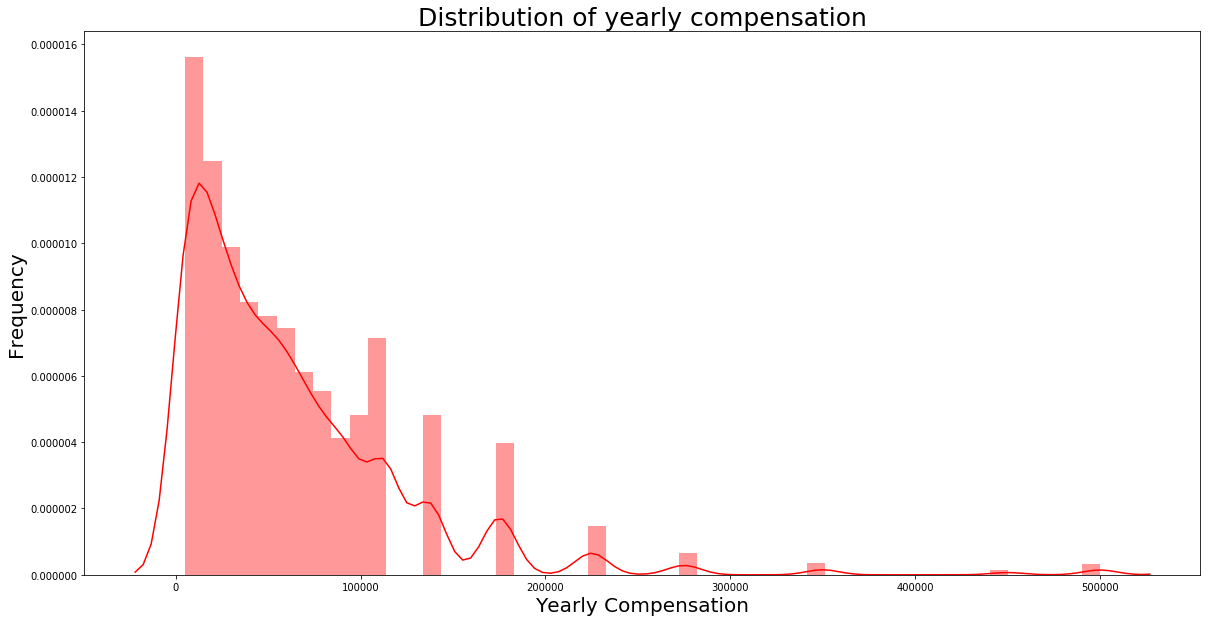

In [100]:
plt.figure(figsize=(20,10))
sb.distplot(salaries["Salary"].astype('float'), color="red")
plt.xlabel("Yearly Compensation", size=20)
plt.ylabel("Frequency", size=20)
plt.title("Distribution of yearly compensation",size=25)


####  As we can see, most of the compensations fall in 0-10,000k range. The distribution is positively skewed.

### Distribution of Salary by AGE

In [101]:
q=salaries.groupby("Age")["Salary"].mean()

q.index

Int64Index([20, 23, 27, 32, 37, 42, 47, 52, 57, 65, 75, 80], dtype='int64', name='Age')

In [102]:
q.values

array([ 24605.26315789,  30223.08354866,  45650.73529412,  65668.47826087,
        74603.18866253,  81337.31343284,  94161.21495327, 107629.13907285,
       121280.        , 114687.94326241, 100000.        , 125714.28571429])

Text(0, 0.5, 'Year Compensation')

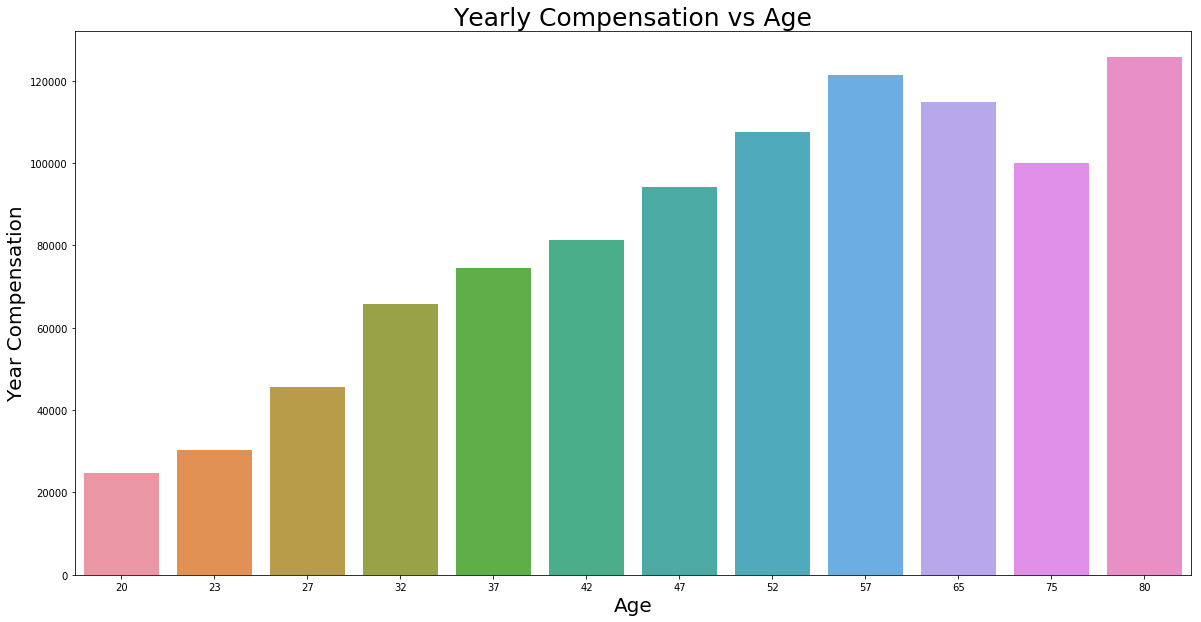

In [103]:
plt.figure(figsize=(20,10))
sb.barplot(q.index,q.values)
plt.xlabel("Age",size=20)
plt.title("Yearly Compensation vs Age",size=25)
plt.ylabel("Year Compensation",size=20)

####  We can infer from the above plot that age is in high correlation with the yearly compemsation,i.e Peple who are elder they usually have high yearly compenation.Hence, Age can be a very important feature in predicting Salary.

### Calculating the Corrlation Matrix

In [104]:
cor=salaries.corr()
cor.head(10)

,Gender,Age,Country,Education,Major,Title,Industry,Experience,Salary,Q10,...,Q37_DataQuest,Q37_Fast.AI,Q37_Kaggle Learn,Q37_Online University Courses,Q37_Other,Q37_TheSchool.AI,Q37_Udacity,Q37_Udemy,Q37_developers.google.com,Q37_edX
Gender,1.000000,0.074090,-0.048040,-0.056885,-0.054185,0.026745,0.017914,0.077315,0.038309,0.010144,...,-0.017605,0.041116,0.013986,-0.003593,-0.025709,0.020326,-0.003880,0.014522,0.002122,0.004158
Age,0.074090,1.000000,0.073322,0.153119,0.068478,-0.033972,-0.041393,0.691390,0.363912,-0.048804,...,-0.020093,-0.009142,-0.024457,0.016038,0.018717,0.016281,-0.013699,-0.021968,0.003049,0.060624
Country,-0.048040,0.073322,1.000000,0.004272,0.070492,-0.035573,0.050222,0.061679,0.387370,0.069202,...,-0.009117,0.013474,-0.035929,0.051911,0.003933,-0.003829,0.017845,-0.014601,0.002239,-0.000135
Education,-0.056885,0.153119,0.004272,1.000000,0.154700,0.055290,-0.140048,0.025571,0.118351,0.110919,...,0.004281,-0.021817,-0.000348,0.003388,-0.030659,-0.007417,-0.017555,-0.057737,-0.014705,0.001799
Major,-0.054185,0.068478,0.070492,0.154700,1.000000,-0.067931,0.030826,-0.014171,0.080208,0.036872,...,-0.001737,-0.018365,-0.007350,0.003916,0.012806,-0.010400,-0.031844,-0.004160,-0.014975,0.000290
Title,0.026745,-0.033972,-0.035573,0.055290,-0.067931,1.000000,-0.131116,0.085965,-0.069651,-0.091732,...,0.007410,0.008695,0.013469,-0.017062,-0.005460,-0.003747,0.016821,-0.018583,0.034212,-0.033279
Industry,0.017914,-0.041393,0.050222,-0.140048,0.030826,-0.131116,1.000000,-0.062161,0.054588,0.034657,...,-0.014966,0.010846,-0.030065,-0.007602,0.002044,0.006011,0.024219,0.002260,-0.006786,-0.005626
Experience,0.077315,0.691390,0.061679,0.025571,-0.014171,0.085965,-0.062161,1.000000,0.295659,-0.079900,...,-0.022540,-0.000246,0.000912,0.011063,0.018325,0.026602,-0.008526,-0.025134,0.031375,0.042750
Salary,0.038309,0.363912,0.387370,0.118351,0.080208,-0.069651,0.054588,0.295659,1.000000,0.224852,...,-0.017760,0.016783,-0.052819,0.026818,-0.009401,0.026529,0.030797,-0.055761,-0.006789,-0.009448
Q10,0.010144,-0.048804,0.069202,0.110919,0.036872,-0.091732,0.034657,-0.079900,0.224852,1.000000,...,-0.043687,0.043708,-0.052855,0.003912,0.006741,0.000269,0.010078,-0.056906,-0.021092,-0.051102


## 3- Feature Selection

Feature selection is also important because if a dataset has a large set of features, it may take a long time to train the ML model and overfitting will most likely occur. Therefore, it is important to reduce the number of features while still retaining a high level of information.In orde

### Feature Correlation

The feature correlation is a measure of how a given feature is related to Salary. A correlation of 1 means the feature is perfectly correlated to Salary. A correlation of 0 means the feature is uncorrelated and has no effect on Salary. A correlation of 1 is considered too high, and a correlation of 0 is too low. A correlation of 0.5 is considered to be a very good feature.

#### Any feature which has correlation for less than 0.01 with the output Salary has beed dropped

In order to reduce the number of features, first I will drop features with a correlation less than 0.01. This is a very low correlation value and means the feature has little affect on Salary. Therefore, the absence of these features should not affect the results.


In [105]:
cor=cor[cor.Salary.astype('float')>0.01]
cor.head(10)

,Gender,Age,Country,Education,Major,Title,Industry,Experience,Salary,Q10,...,Q37_DataQuest,Q37_Fast.AI,Q37_Kaggle Learn,Q37_Online University Courses,Q37_Other,Q37_TheSchool.AI,Q37_Udacity,Q37_Udemy,Q37_developers.google.com,Q37_edX
Gender,1.000000,0.074090,-0.048040,-0.056885,-0.054185,0.026745,0.017914,0.077315,0.038309,0.010144,...,-0.017605,0.041116,0.013986,-0.003593,-0.025709,0.020326,-0.003880,0.014522,0.002122,0.004158
Age,0.074090,1.000000,0.073322,0.153119,0.068478,-0.033972,-0.041393,0.691390,0.363912,-0.048804,...,-0.020093,-0.009142,-0.024457,0.016038,0.018717,0.016281,-0.013699,-0.021968,0.003049,0.060624
Country,-0.048040,0.073322,1.000000,0.004272,0.070492,-0.035573,0.050222,0.061679,0.387370,0.069202,...,-0.009117,0.013474,-0.035929,0.051911,0.003933,-0.003829,0.017845,-0.014601,0.002239,-0.000135
Education,-0.056885,0.153119,0.004272,1.000000,0.154700,0.055290,-0.140048,0.025571,0.118351,0.110919,...,0.004281,-0.021817,-0.000348,0.003388,-0.030659,-0.007417,-0.017555,-0.057737,-0.014705,0.001799
Major,-0.054185,0.068478,0.070492,0.154700,1.000000,-0.067931,0.030826,-0.014171,0.080208,0.036872,...,-0.001737,-0.018365,-0.007350,0.003916,0.012806,-0.010400,-0.031844,-0.004160,-0.014975,0.000290
Industry,0.017914,-0.041393,0.050222,-0.140048,0.030826,-0.131116,1.000000,-0.062161,0.054588,0.034657,...,-0.014966,0.010846,-0.030065,-0.007602,0.002044,0.006011,0.024219,0.002260,-0.006786,-0.005626
Experience,0.077315,0.691390,0.061679,0.025571,-0.014171,0.085965,-0.062161,1.000000,0.295659,-0.079900,...,-0.022540,-0.000246,0.000912,0.011063,0.018325,0.026602,-0.008526,-0.025134,0.031375,0.042750
Salary,0.038309,0.363912,0.387370,0.118351,0.080208,-0.069651,0.054588,0.295659,1.000000,0.224852,...,-0.017760,0.016783,-0.052819,0.026818,-0.009401,0.026529,0.030797,-0.055761,-0.006789,-0.009448
Q10,0.010144,-0.048804,0.069202,0.110919,0.036872,-0.091732,0.034657,-0.079900,0.224852,1.000000,...,-0.043687,0.043708,-0.052855,0.003912,0.006741,0.000269,0.010078,-0.056906,-0.021092,-0.051102
Q24,0.059520,0.523678,0.132531,0.209895,0.118979,-0.057031,-0.016052,0.472318,0.371521,0.139200,...,-0.031554,0.016399,-0.037264,0.004693,0.002014,0.007264,-0.022837,-0.047851,0.006866,0.017430


#### Also done by Calulating Correlation Matrix and plotting the heat map of correlation of feature with the Output Target Salar

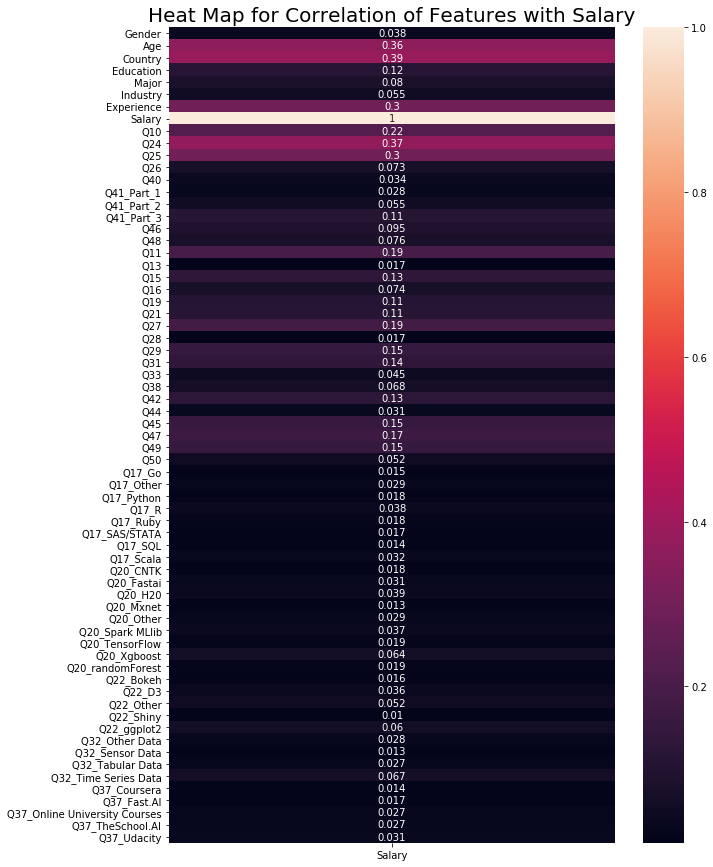

In [106]:
plt.figure(figsize=(10,15))
plt.title("Heat Map for Correlation of Features with Salary",size=20)
plt.ylabel("Features")
plt.xlabel("Salary Feature")
sb.heatmap(cor[["Salary"]],annot=True)

### Correlation of top 10 features

In [107]:
top_10=cor[cor.Salary>0.16]
top_10



,Gender,Age,Country,Education,Major,Title,Industry,Experience,Salary,Q10,...,Q37_DataQuest,Q37_Fast.AI,Q37_Kaggle Learn,Q37_Online University Courses,Q37_Other,Q37_TheSchool.AI,Q37_Udacity,Q37_Udemy,Q37_developers.google.com,Q37_edX
Age,0.074090,1.000000,0.073322,0.153119,0.068478,-0.033972,-0.041393,0.691390,0.363912,-0.048804,...,-0.020093,-0.009142,-0.024457,0.016038,0.018717,0.016281,-0.013699,-0.021968,0.003049,0.060624
Country,-0.048040,0.073322,1.000000,0.004272,0.070492,-0.035573,0.050222,0.061679,0.387370,0.069202,...,-0.009117,0.013474,-0.035929,0.051911,0.003933,-0.003829,0.017845,-0.014601,0.002239,-0.000135
Experience,0.077315,0.691390,0.061679,0.025571,-0.014171,0.085965,-0.062161,1.000000,0.295659,-0.079900,...,-0.022540,-0.000246,0.000912,0.011063,0.018325,0.026602,-0.008526,-0.025134,0.031375,0.042750
Salary,0.038309,0.363912,0.387370,0.118351,0.080208,-0.069651,0.054588,0.295659,1.000000,0.224852,...,-0.017760,0.016783,-0.052819,0.026818,-0.009401,0.026529,0.030797,-0.055761,-0.006789,-0.009448
Q10,0.010144,-0.048804,0.069202,0.110919,0.036872,-0.091732,0.034657,-0.079900,0.224852,1.000000,...,-0.043687,0.043708,-0.052855,0.003912,0.006741,0.000269,0.010078,-0.056906,-0.021092,-0.051102
Q24,0.059520,0.523678,0.132531,0.209895,0.118979,-0.057031,-0.016052,0.472318,0.371521,0.139200,...,-0.031554,0.016399,-0.037264,0.004693,0.002014,0.007264,-0.022837,-0.047851,0.006866,0.017430
Q25,0.059682,0.309056,0.050179,0.238424,0.055375,-0.009708,-0.025730,0.285977,0.298077,0.251330,...,-0.027347,0.026090,-0.038054,-0.005043,-0.030280,0.001506,-0.002853,-0.051370,0.004213,-0.017437
Q11,0.053210,-0.019212,0.068888,0.057082,0.018588,-0.145216,0.052638,-0.046543,0.192084,0.406875,...,-0.018815,0.048368,-0.034959,0.017352,-0.006334,-0.018071,0.013208,-0.018917,0.009181,-0.028230
Q27,0.069863,-0.005989,0.084428,-0.028941,-0.040458,0.009396,0.067192,-0.005383,0.186490,0.194555,...,-0.022247,0.081753,-0.035801,0.003567,-0.026808,0.006225,0.066444,-0.020059,0.035374,-0.028981
Q47,0.001766,0.028671,0.099042,0.148172,0.113423,-0.088317,0.030330,-0.020592,0.165318,0.246790,...,0.000109,0.037675,-0.016979,0.051514,-0.006510,-0.010364,0.014460,-0.015740,0.002242,0.006715


Text(0.5, 1.0, 'Correlation Values for top 10 Features')

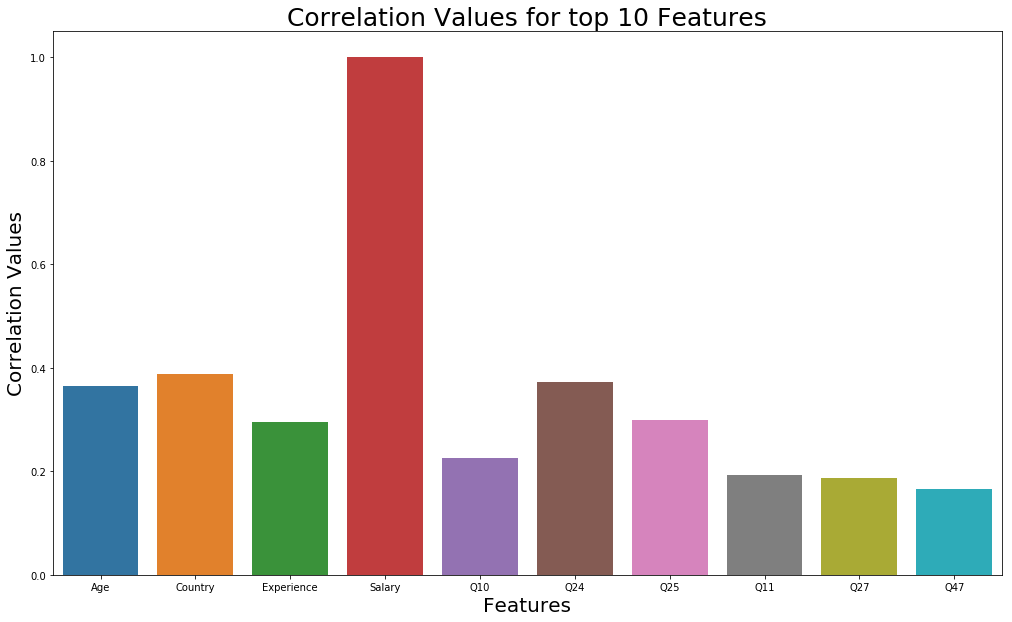

In [108]:
plt.figure(figsize=(17,10))
sb.barplot(top_10.index,top_10.Salary)
plt.ylabel("Correlation Values",size=20)
plt.xlabel("Features",size=20)
plt.title("Correlation Values for top 10 Features", size=25)


In [109]:
cor.index

Index(['Gender', 'Age', 'Country', 'Education', 'Major', 'Industry',
       'Experience', 'Salary', 'Q10', 'Q24', 'Q25', 'Q26', 'Q40', 'Q41_Part_1',
       'Q41_Part_2', 'Q41_Part_3', 'Q46', 'Q48', 'Q11', 'Q13', 'Q15', 'Q16',
       'Q19', 'Q21', 'Q27', 'Q28', 'Q29', 'Q31', 'Q33', 'Q38', 'Q42', 'Q44',
       'Q45', 'Q47', 'Q49', 'Q50', 'Q17_Go', 'Q17_Other', 'Q17_Python',
       'Q17_R', 'Q17_Ruby', 'Q17_SAS/STATA', 'Q17_SQL', 'Q17_Scala',
       'Q20_CNTK', 'Q20_Fastai', 'Q20_H20', 'Q20_Mxnet', 'Q20_Other',
       'Q20_Spark MLlib', 'Q20_TensorFlow', 'Q20_Xgboost', 'Q20_randomForest',
       'Q22_Bokeh', 'Q22_D3', 'Q22_Other', 'Q22_Shiny', 'Q22_ggplot2',
       'Q32_Other Data', 'Q32_Sensor Data', 'Q32_Tabular Data',
       'Q32_Time Series Data', 'Q37_Coursera', 'Q37_Fast.AI',
       'Q37_Online University Courses', 'Q37_TheSchool.AI', 'Q37_Udacity'],
      dtype='object')

Now we are using only these set of features as mentioned above in cor.index and created a new dataframe with these set of 67 features

In [110]:
new_salaries=salaries[cor.index]
new_salaries.head()

,Gender,Age,Country,Education,Major,Industry,Experience,Salary,Q10,Q24,...,Q22_ggplot2,Q32_Other Data,Q32_Sensor Data,Q32_Tabular Data,Q32_Time Series Data,Q37_Coursera,Q37_Fast.AI,Q37_Online University Courses,Q37_TheSchool.AI,Q37_Udacity
7,1,37,38,7,7,0,12.5,15000,1,0.5,...,0,0,0,0,0,0,0,0,0,0
8,1,20,1111,5,7,15,0.5,5000,4,0.5,...,0,0,0,0,0,0,0,0,0,1
10,1,32,43,5,2,14,3.5,25000,5,1.5,...,0,0,0,1,0,0,0,0,0,0
12,1,42,2006,5,2,15,7.5,137000,4,10.0,...,0,0,0,0,0,0,0,0,0,1
14,1,27,2006,4,8,0,1.5,35000,2,4.0,...,0,0,0,0,1,0,0,0,0,0


 ### Filling in Missing Values for new data frame new_salaries

Now, There are still some columns have missing values i have to deal with

#### Q41_Part_3
Filling the Nan Value with 0 for this feature

In [111]:
new_salaries.Q41_Part_3.isnull().value_counts()

False    7892
True      616
Name: Q41_Part_3, dtype: int64

In [112]:
new_salaries.shape

(8508, 67)

In [113]:
new_salaries["Q41_Part_3"].fillna(0, inplace=True)

In [114]:
new_salaries.head()

,Gender,Age,Country,Education,Major,Industry,Experience,Salary,Q10,Q24,...,Q22_ggplot2,Q32_Other Data,Q32_Sensor Data,Q32_Tabular Data,Q32_Time Series Data,Q37_Coursera,Q37_Fast.AI,Q37_Online University Courses,Q37_TheSchool.AI,Q37_Udacity
7,1,37,38,7,7,0,12.5,15000,1,0.5,...,0,0,0,0,0,0,0,0,0,0
8,1,20,1111,5,7,15,0.5,5000,4,0.5,...,0,0,0,0,0,0,0,0,0,1
10,1,32,43,5,2,14,3.5,25000,5,1.5,...,0,0,0,1,0,0,0,0,0,0
12,1,42,2006,5,2,15,7.5,137000,4,10.0,...,0,0,0,0,0,0,0,0,0,1
14,1,27,2006,4,8,0,1.5,35000,2,4.0,...,0,0,0,0,1,0,0,0,0,0


#### Q25,Q24-
Filling the Nan Value with 0 for this feature

In [115]:
new_salaries["Q25"].fillna(0, inplace=True)


In [116]:
new_salaries["Q24"].fillna(0, inplace=True)

In [117]:
new_salaries.Q24.isnull().value_counts()

False    8508
Name: Q24, dtype: int64

In [118]:
new_salaries.Q41_Part_3.isnull().value_counts()

False    8508
Name: Q41_Part_3, dtype: int64

In [119]:
new_salaries["Q41_Part_2"].fillna(0, inplace=True)


In [120]:
new_salaries.Q41_Part_1.isnull().value_counts()
new_salaries.Q41_Part_1.mode()
new_salaries.Q41_Part_1.fillna(3,inplace=True)
new_salaries.Q41_Part_1.isnull().value_counts()

False    8508
Name: Q41_Part_1, dtype: int64

In [121]:
new_salaries.Q41_Part_2.isnull().value_counts()

False    8508
Name: Q41_Part_2, dtype: int64


#### Q46 says -
Approximately what percent of your data projects involve exploring model insights?
For this case it is logical to fill in with the mode of the columnn.

In [122]:
new_salaries.Q46.isnull().value_counts()

False    7218
True     1290
Name: Q46, dtype: int64

In [123]:
new_salaries['Q46'].fillna(17, inplace=True)

#### Q48 says Do you consider ML models to be "black boxes" with outputs that are difficult or impossible to explain?
For this question since most of the peple want to be aspiring data scientists so filling with zero doesnt make sense.
It would be better to assume that -
I am confident that I can understand and explain the outputs of many but not all ML models': 3,


In [124]:
new_salaries['Q48'].fillna(3, inplace=True)

In [125]:
new_salaries.Q46.isnull().value_counts()

False    8508
Name: Q46, dtype: int64

In [126]:
new_salaries.Q48.isnull().value_counts()

False    8508
Name: Q48, dtype: int64

#### Q26 Do you consider yourself to be a data scientist?
For this we can replce by the mean
so 3 encoding signifies Mayb they consider themselvers to be data scietists

In [127]:
new_salaries.Q26.mean()

3.588221464676149

In [128]:
new_salaries['Q26'].fillna(3, inplace=True)

In [129]:
salaries.shape

(8508, 127)

In [130]:
new_salaries.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [131]:
new_salaries.head()

,Gender,Age,Country,Education,Major,Industry,Experience,Salary,Q10,Q24,...,Q22_ggplot2,Q32_Other Data,Q32_Sensor Data,Q32_Tabular Data,Q32_Time Series Data,Q37_Coursera,Q37_Fast.AI,Q37_Online University Courses,Q37_TheSchool.AI,Q37_Udacity
7,1,37,38,7,7,0,12.5,15000,1,0.5,...,0,0,0,0,0,0,0,0,0,0
8,1,20,1111,5,7,15,0.5,5000,4,0.5,...,0,0,0,0,0,0,0,0,0,1
10,1,32,43,5,2,14,3.5,25000,5,1.5,...,0,0,0,1,0,0,0,0,0,0
12,1,42,2006,5,2,15,7.5,137000,4,10.0,...,0,0,0,0,0,0,0,0,0,1
14,1,27,2006,4,8,0,1.5,35000,2,4.0,...,0,0,0,0,1,0,0,0,0,0


## Scaling of Features

Feature Scaling or Standardization: It is a step of Data Pre Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.

Examples of Algorithms where Feature Scaling matters
1. K-Means uses the Euclidean distance measure here feature scaling matters.
2. K-Nearest-Neighbours also require feature scaling.
3. Principal Component Analysis (PCA): Tries to get the feature with maximum variance, here too feature scaling is required.
4. Gradient Descent: Calculation speed increase as Theta calculation becomes faster after feature scaling.

For Logistic Regression feature scaling doesnt matter much, but still i have done the scaling of features to see the difference in my results. And in the end i see that my accuracy is only increasing by 0.5% by feature scaling which is negligible.

In [132]:
features=new_salaries.drop('Salary',axis=1)
features
new_salaries.head()

,Gender,Age,Country,Education,Major,Industry,Experience,Salary,Q10,Q24,...,Q22_ggplot2,Q32_Other Data,Q32_Sensor Data,Q32_Tabular Data,Q32_Time Series Data,Q37_Coursera,Q37_Fast.AI,Q37_Online University Courses,Q37_TheSchool.AI,Q37_Udacity
7,1,37,38,7,7,0,12.5,15000,1,0.5,...,0,0,0,0,0,0,0,0,0,0
8,1,20,1111,5,7,15,0.5,5000,4,0.5,...,0,0,0,0,0,0,0,0,0,1
10,1,32,43,5,2,14,3.5,25000,5,1.5,...,0,0,0,1,0,0,0,0,0,0
12,1,42,2006,5,2,15,7.5,137000,4,10.0,...,0,0,0,0,0,0,0,0,0,1
14,1,27,2006,4,8,0,1.5,35000,2,4.0,...,0,0,0,0,1,0,0,0,0,0


In [133]:
scaler=StandardScaler()
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [134]:
scaled_features=scaler.transform(features)
scaled_features
df_scaled=pd.DataFrame(scaled_features,columns=features.columns)
df_scaled.head(3)

,Gender,Age,Country,Education,Major,Industry,Experience,Q10,Q24,Q25,...,Q22_ggplot2,Q32_Other Data,Q32_Sensor Data,Q32_Tabular Data,Q32_Time Series Data,Q37_Coursera,Q37_Fast.AI,Q37_Online University Courses,Q37_TheSchool.AI,Q37_Udacity
0,0.332213,0.396792,-0.924251,1.641717,0.758845,-1.120069,1.105555,-1.247460,-0.767438,-0.528291,...,-0.489583,-0.06609,-0.177898,-0.48145,-0.354744,-0.580427,-0.137558,-0.172554,-0.032541,-0.237146
1,0.332213,-1.363164,0.475181,0.039178,0.758845,1.767556,-0.779962,0.746913,-0.767438,-0.528291,...,-0.489583,-0.06609,-0.177898,-0.48145,-0.354744,-0.580427,-0.137558,-0.172554,-0.032541,4.216806
2,0.332213,-0.120842,-0.917730,0.039178,-0.518256,1.575047,-0.308583,1.411704,-0.602315,-0.528291,...,-0.489583,-0.06609,-0.177898,2.07706,-0.354744,-0.580427,-0.137558,-0.172554,-0.032541,-0.237146


### My final X , Y are features and new_salaries.Salary that are to be splitted which include 66 features and  8505 people for survery.

In [203]:
features.shape

(8508, 66)

## 4- Model Implementation

Logistic regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function.

Pros:
1. There is no homogeneity of variance assumption.
2. Computation time is short.

Cons:
1. Easy to overfit the model.
2. Logistic regression attempts to predict outcomes based on a set of independent variables.

#### For my case since number of finals row are 8508 so i have taken 75% of it as training set. Which comes out to be 6381 data points for training.

In [204]:
print("Number of training Data points=",8508*.75)

Number of training Data points= 6381.0


In [135]:
X_train, X_test, y_train, y_test = train_test_split(features,new_salaries.Salary , test_size=0.25, random_state=0)


##### Since my problem is based upon multiclassification problem which has 18 categories of salaries ranges. So i used one vs all scheme my implementing multiple binary logistic regression problems. For this purpoese i used sckit learn Library-

sklearn.linear_model.LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, max_iter=100, multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’.

So for my case i set the multiclass option to "ovr" beacuse i wanted to implement one vs rest scheme.

In [136]:
log=LogisticRegression(C=1,solver="newton-cg", multi_class="ovr", max_iter=1000)

### Implementing Logistic Regression Algorithm on Training Data with 10-Fold Cross-Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

In [137]:
## Code for doing the 10 fold cross-validation using logisticRegression as a model
kfold = KFold(n_splits=10)
log=LogisticRegression(C=1,solver="newton-cg", multi_class="ovr", max_iter=100)
results = cross_val_score(log, X_train, y_train, cv=kfold)


### Average and Variance of Accuracies across the 10-Folds in Cross-Validation



In [138]:
log.fit(X_train,y_train) 
for i in range(10):
    print("Cross Validation Accuracy for   Fold ",i, "=",100*results[i])

print("Average of Accuracies for all folds=",round(100*results.mean()))
print("Variance of Accuracies for all folds=",np.var(results))
  

Cross Validation Accuracy for   Fold  0 = 19.248826291079812
Cross Validation Accuracy for   Fold  1 = 21.9435736677116
Cross Validation Accuracy for   Fold  2 = 19.435736677115987
Cross Validation Accuracy for   Fold  3 = 20.532915360501566
Cross Validation Accuracy for   Fold  4 = 23.197492163009404
Cross Validation Accuracy for   Fold  5 = 20.532915360501566
Cross Validation Accuracy for   Fold  6 = 20.219435736677116
Cross Validation Accuracy for   Fold  7 = 21.15987460815047
Cross Validation Accuracy for   Fold  8 = 21.9435736677116
Cross Validation Accuracy for   Fold  9 = 21.003134796238246
Average of Accuracies for all folds= 21.0
Variance of Accuracies for all folds= 0.00013133115832179065


### Predicting the output accuracy on training and testing  set

In [139]:
print("Accuracy on training test=",round(100*log.score(X_train,y_train)),"%")
print("Accuracy on testing Set=",round(100*log.score(X_test,y_test)),"%")

Accuracy on training test= 25.0 %
Accuracy on testing Set= 21.0 %


### Funtion to plot the histogram for the probabilities of lying a particular persons salary in different ranges.

### This fucntion predicts histogram for any person in training set

In [140]:
#### Here i, is the index of row for which we will pass the set of features
def prob_hist_train(i):
    l=['0-10,000','10-20,000','20-30,000','30-40,000','40-50,000','50-60,000',
                  '60-70,000','70-80,000','80-90,000','90-100,000','100-125,000','125-150,000',
                  '150-200,000','200-250,000','250-300,000','300-400,000','400-500,000','500,000+']
    plt.figure(figsize=(40,20))
    import matplotlib as mpl
    label_size =17
    mpl.rcParams['xtick.labelsize'] = label_size 
    plt.title("Probability distribution",size=35,color="black")
    plt.ylabel("Probability",size=30,color="red")
    plt.xlabel("Salary Range",size=30,color="red")
   
    
    return sb.barplot(l,probabilities_train[i])


## Finding the output histogram first for any random person in training set.
#### After the Model has been cross validated on training set

The predictions and the probabilities on the training set are obtained during cross validation as follows-
Using cross_val_predict fuction one just as it is another with method as predict_proba

In [141]:
predictions_train=cross_val_predict(log, X_train, y_train, cv=10)
probabilities_train=cross_val_predict(log, X_train, y_train, cv=10, method='predict_proba')

In [142]:
print(predictions_train)
print(probabilities_train)

[113000   5000 137000 ...  15000   5000   5000]
[[4.35008786e-02 1.22581735e-01 2.62391744e-02 ... 3.51939383e-03
  3.72147444e-08 1.70945871e-03]
 [2.61269629e-01 1.64738545e-01 8.77901064e-02 ... 5.32858841e-04
  2.76788630e-05 5.72231513e-04]
 [4.91126955e-02 8.00010405e-02 4.35628931e-02 ... 4.66929231e-03
  1.19852520e-05 1.64705848e-03]
 ...
 [8.35868990e-02 1.13433252e-01 8.48845718e-02 ... 1.17498226e-03
  3.46595683e-05 1.96444743e-04]
 [3.39211243e-01 2.04650231e-01 1.39765685e-01 ... 9.09853160e-06
  6.35552094e-04 1.01583200e-04]
 [3.30414426e-01 2.40258958e-01 1.23044847e-01 ... 1.63294669e-05
  1.92074734e-05 7.37071224e-05]]


### Suppose we find the histogram of probabilities for the 8th person 
####  1- And lets compare his probability with the actual salary range  for that person

#### So, 8th persons actual salary range in the y_train is 

In [143]:
print(y_train.iloc[7])
print("This Implies his salary range would be= 0-10,000k ")


5000
This Implies his salary range would be= 0-10,000k 


### This is the output of what our model predicts

His actual Salary Range is = 0-10,000k
We can see from the histogram that he has the highest probability for his salary also lies in 0-10,000k range =  0.223


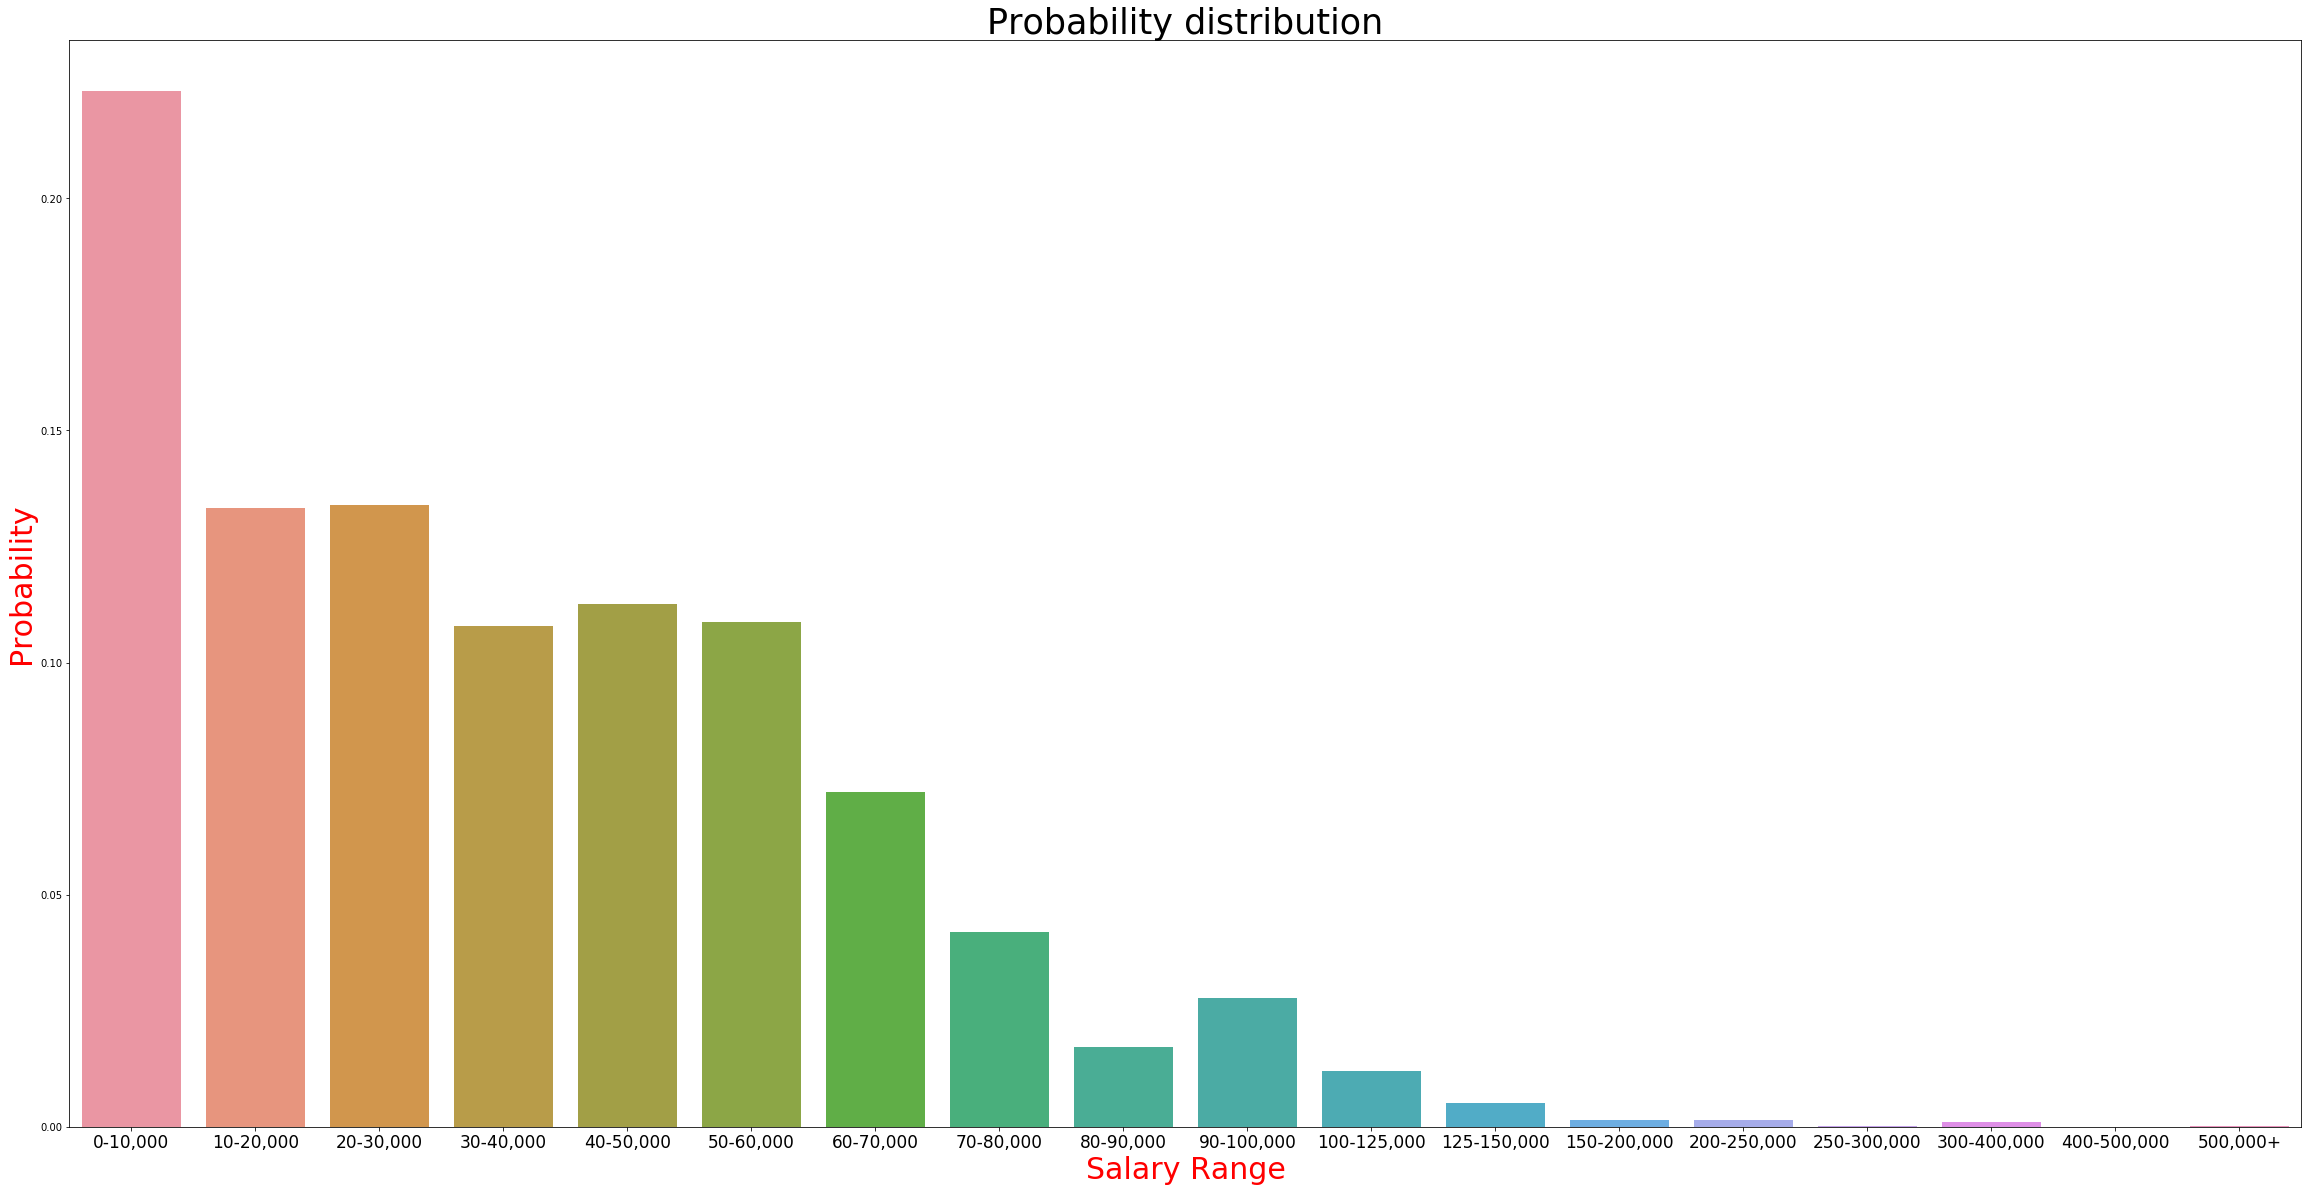

In [144]:
print("His actual Salary Range is = 0-10,000k")
prob_hist_train(7)

print("We can see from the histogram that he has the highest probability for his salary also lies in 0-10,000k range = ",round(probabilities_train[7][0],3))


### We can see for the above case our classification Model is doing Pretty well. Now lets check for the other case

### Suppose we find the histogram of probabilities for the 50th person. And lets compare his probability with the actual prediction for that person

#### 50th persons actual salary in the training set is found to be-

In [145]:
y_train.iloc[49]

25000

His actual Salary Range prediction= 25000
We can see from the histogram that he has the highest probability for his salary lying in 0-10,100k range = 0.27


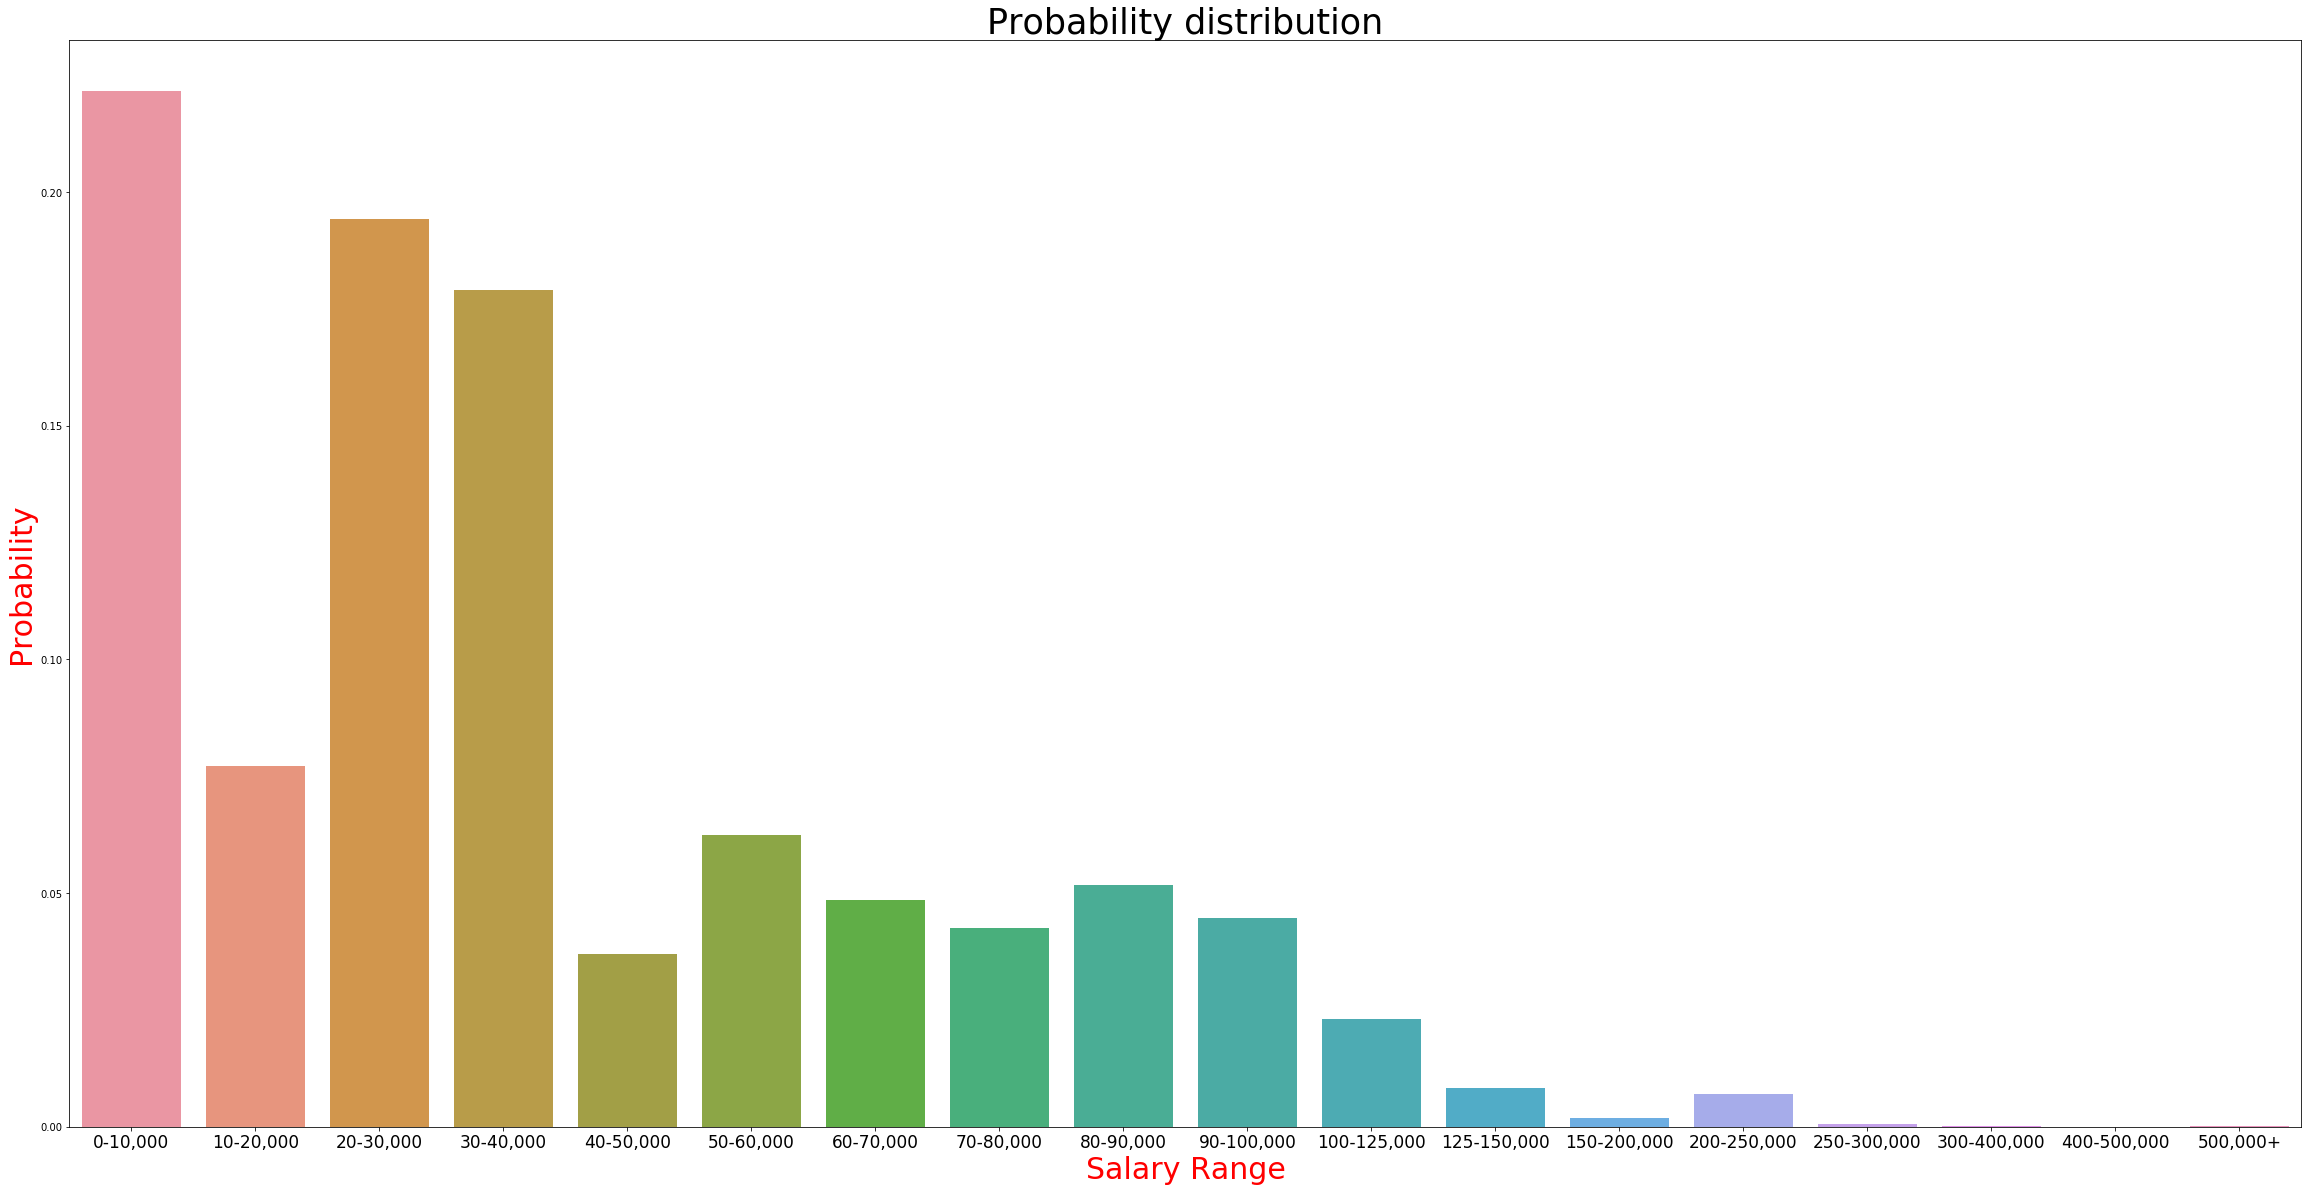

In [146]:
print("His actual Salary Range prediction=",y_train.iloc[49])
prob_hist_train(49)

print("We can see from the histogram that he has the highest probability for his salary lying in 0-10,100k range = 0.27")

#### In this case the model is not doing so well it predicts the highest probability for the range of salary =0-10,000k. But the 50th persons actual salary lies in range of 10-20,000k

## Now, lets test our Classification Model on Testing Set

In [147]:
predictions_test=log.predict(X_test)
probabilities_test=log.predict_proba(X_test)
print(predictions_test)
print(probabilities_test)

[ 45000   5000  15000 ...   5000 113000 113000]
[[7.18782716e-02 4.62236728e-02 1.40382184e-01 ... 5.61410038e-05
  1.61298090e-04 5.93548856e-04]
 [1.58740191e-01 1.55130208e-01 1.28646850e-01 ... 9.69436245e-04
  6.11940376e-04 1.37536491e-04]
 [6.45685463e-02 1.35197787e-01 7.59812753e-02 ... 1.12770013e-03
  9.53178602e-05 4.45743680e-03]
 ...
 [3.51527483e-01 9.19817621e-02 1.12996933e-01 ... 4.22231458e-04
  4.59116681e-04 1.51877671e-04]
 [5.06097624e-03 1.46273284e-02 1.20323483e-02 ... 5.27676110e-04
  1.14945189e-05 1.45341932e-02]
 [6.25584117e-03 4.86497407e-02 8.59090990e-02 ... 1.26057677e-03
  1.31707175e-04 2.84999367e-04]]


### Funtion to plot the histogram for the probabilities of lying a particular persons salary in different ranges.This fucntion predicts histogram for any person in training set

In [148]:
def prob_hist_test(i):
    l=['0-10,000','10-20,000','20-30,000','30-40,000','40-50,000','50-60,000',
                  '60-70,000','70-80,000','80-90,000','90-100,000','100-125,000','125-150,000',
                  '150-200,000','200-250,000','250-300,000','300-400,000','400-500,000','500,000+']
    plt.figure(figsize=(40,20))
    import matplotlib as mpl
    label_size =17
    mpl.rcParams['xtick.labelsize'] = label_size 
    plt.title("Probability distribution",size=35,color="black")
    plt.ylabel("Probability",size=30,color="red")
    plt.xlabel("Salary Range",size=30,color="red")
   
    
    return sb.barplot(l,probabilities_test[i])

### Suppose we find the histogram of probabilities for the 8th person in tesing set
### 1- And lets compare his probability with the actual salary range for that person
### So, 8th persons actual salary range in the y_test is

In [149]:
print(y_test.iloc[7])

print("This Implies his salary range would be= 0-10,000k ")


5000
This Implies his salary range would be= 0-10,000k 


### This is the ouput of what our Model Predicts

His actual Salary Range is 0-10,000k
We can see from the histogram that he has the highest probability for his salary also lies in 0-10,000k range =  0.486


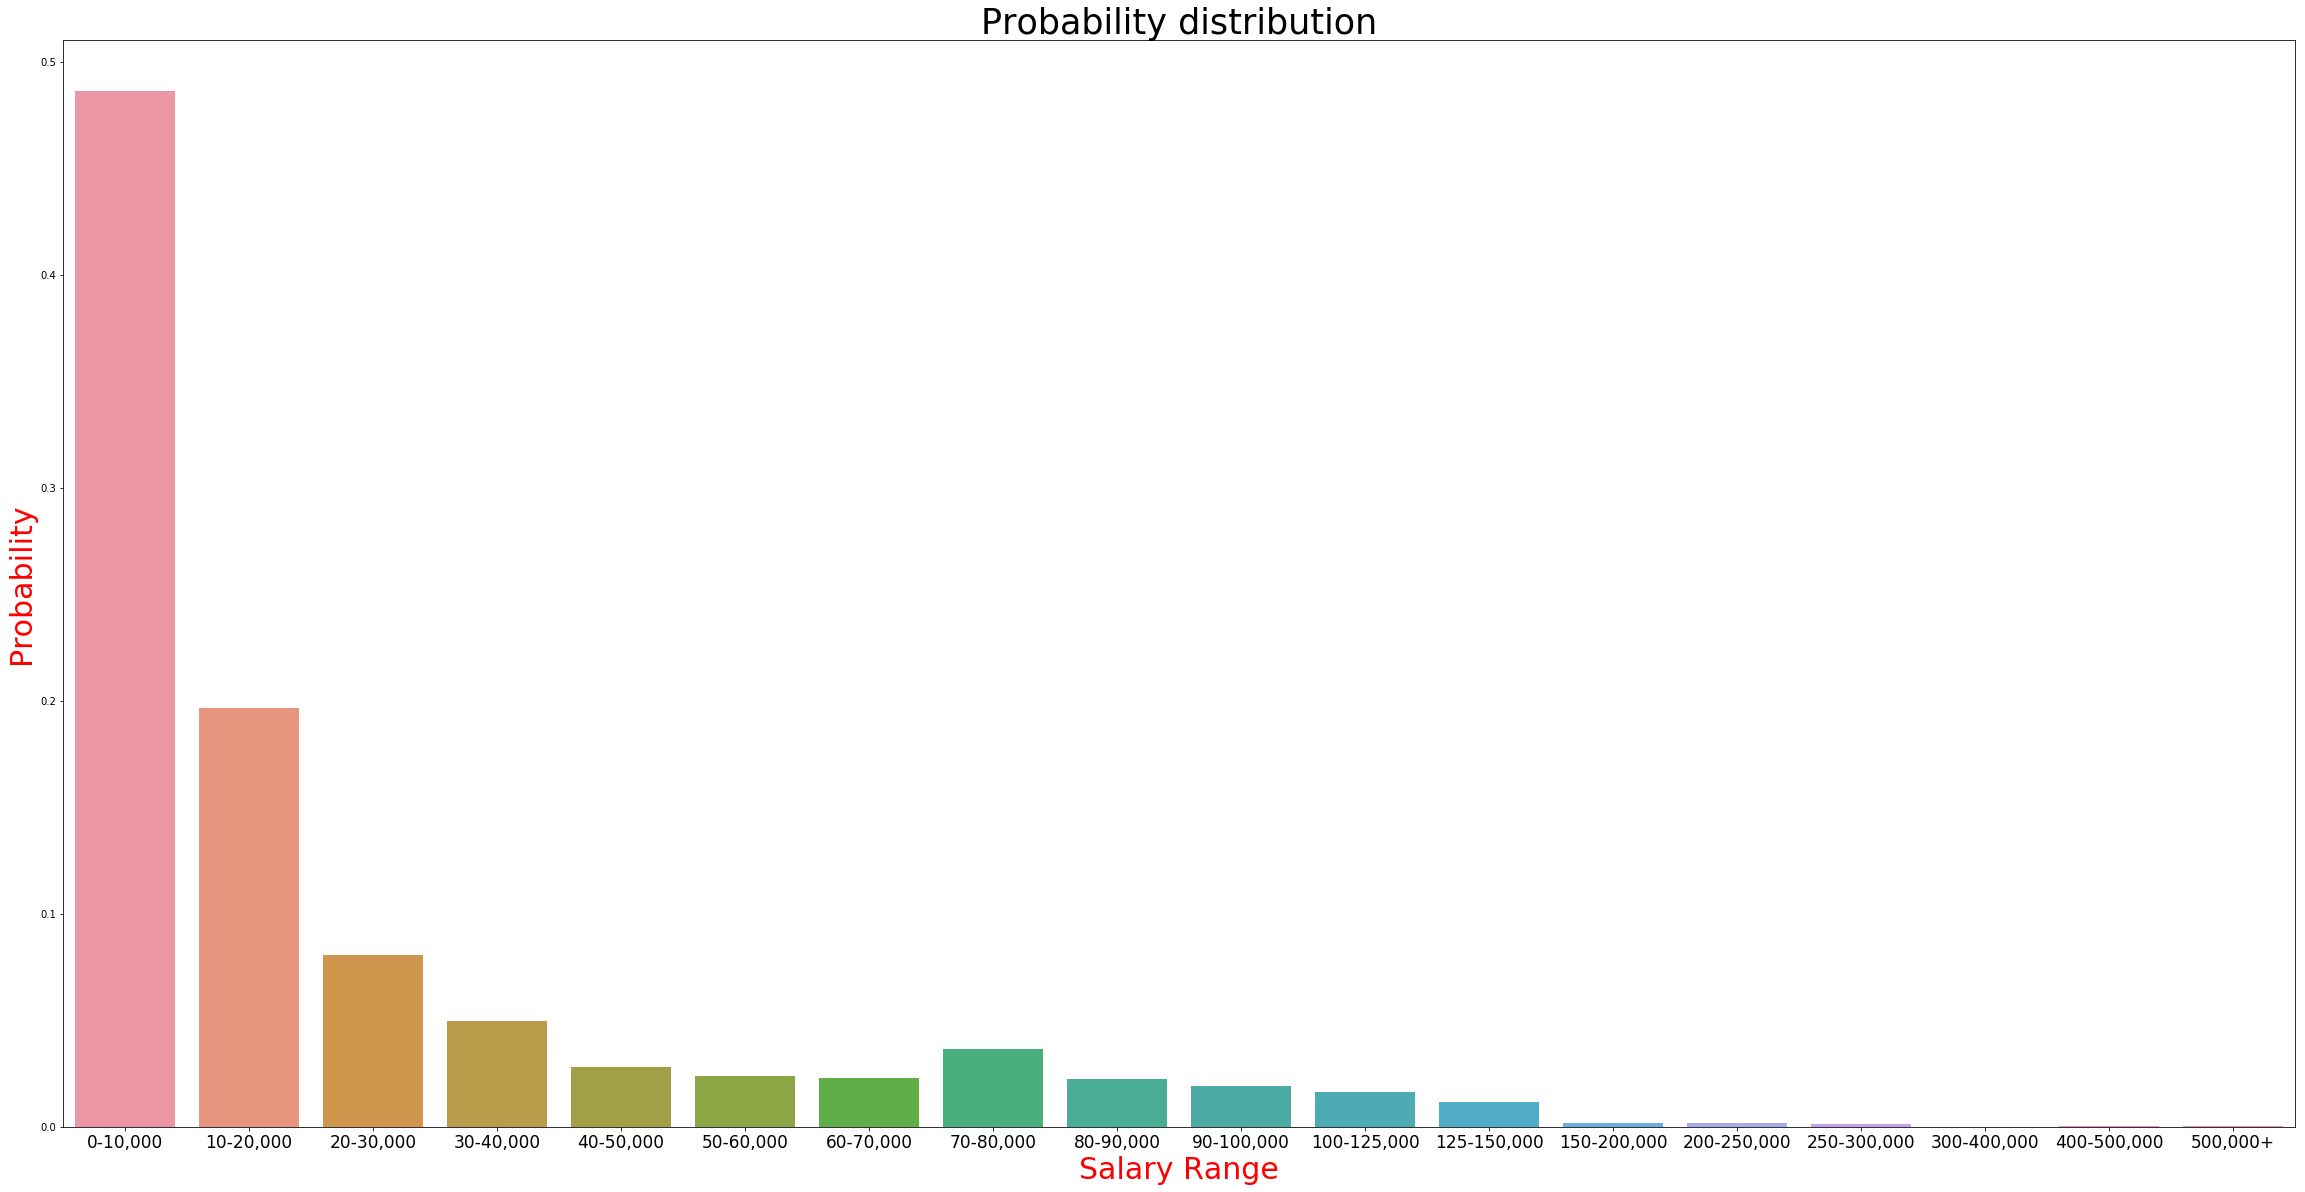

In [150]:
print("His actual Salary Range is 0-10,000k")
prob_hist_test(7)

print("We can see from the histogram that he has the highest probability for his salary also lies in 0-10,000k range = ",round(probabilities_test[7][0],3))


### We can see for the above case our classification Model is doing Pretty well on the test set as well. Now lets check for the other case

### Now lets take another person in test set. Suppose we take 100th person. So, 100th persons actual salary range in the y_test is



In [151]:
y_test.iloc[49]

45000

His actual Salary Range is = 45000
We can see from the histogram that he has the highest probability for his salary  lies in 10-20,000k range = 0.24 


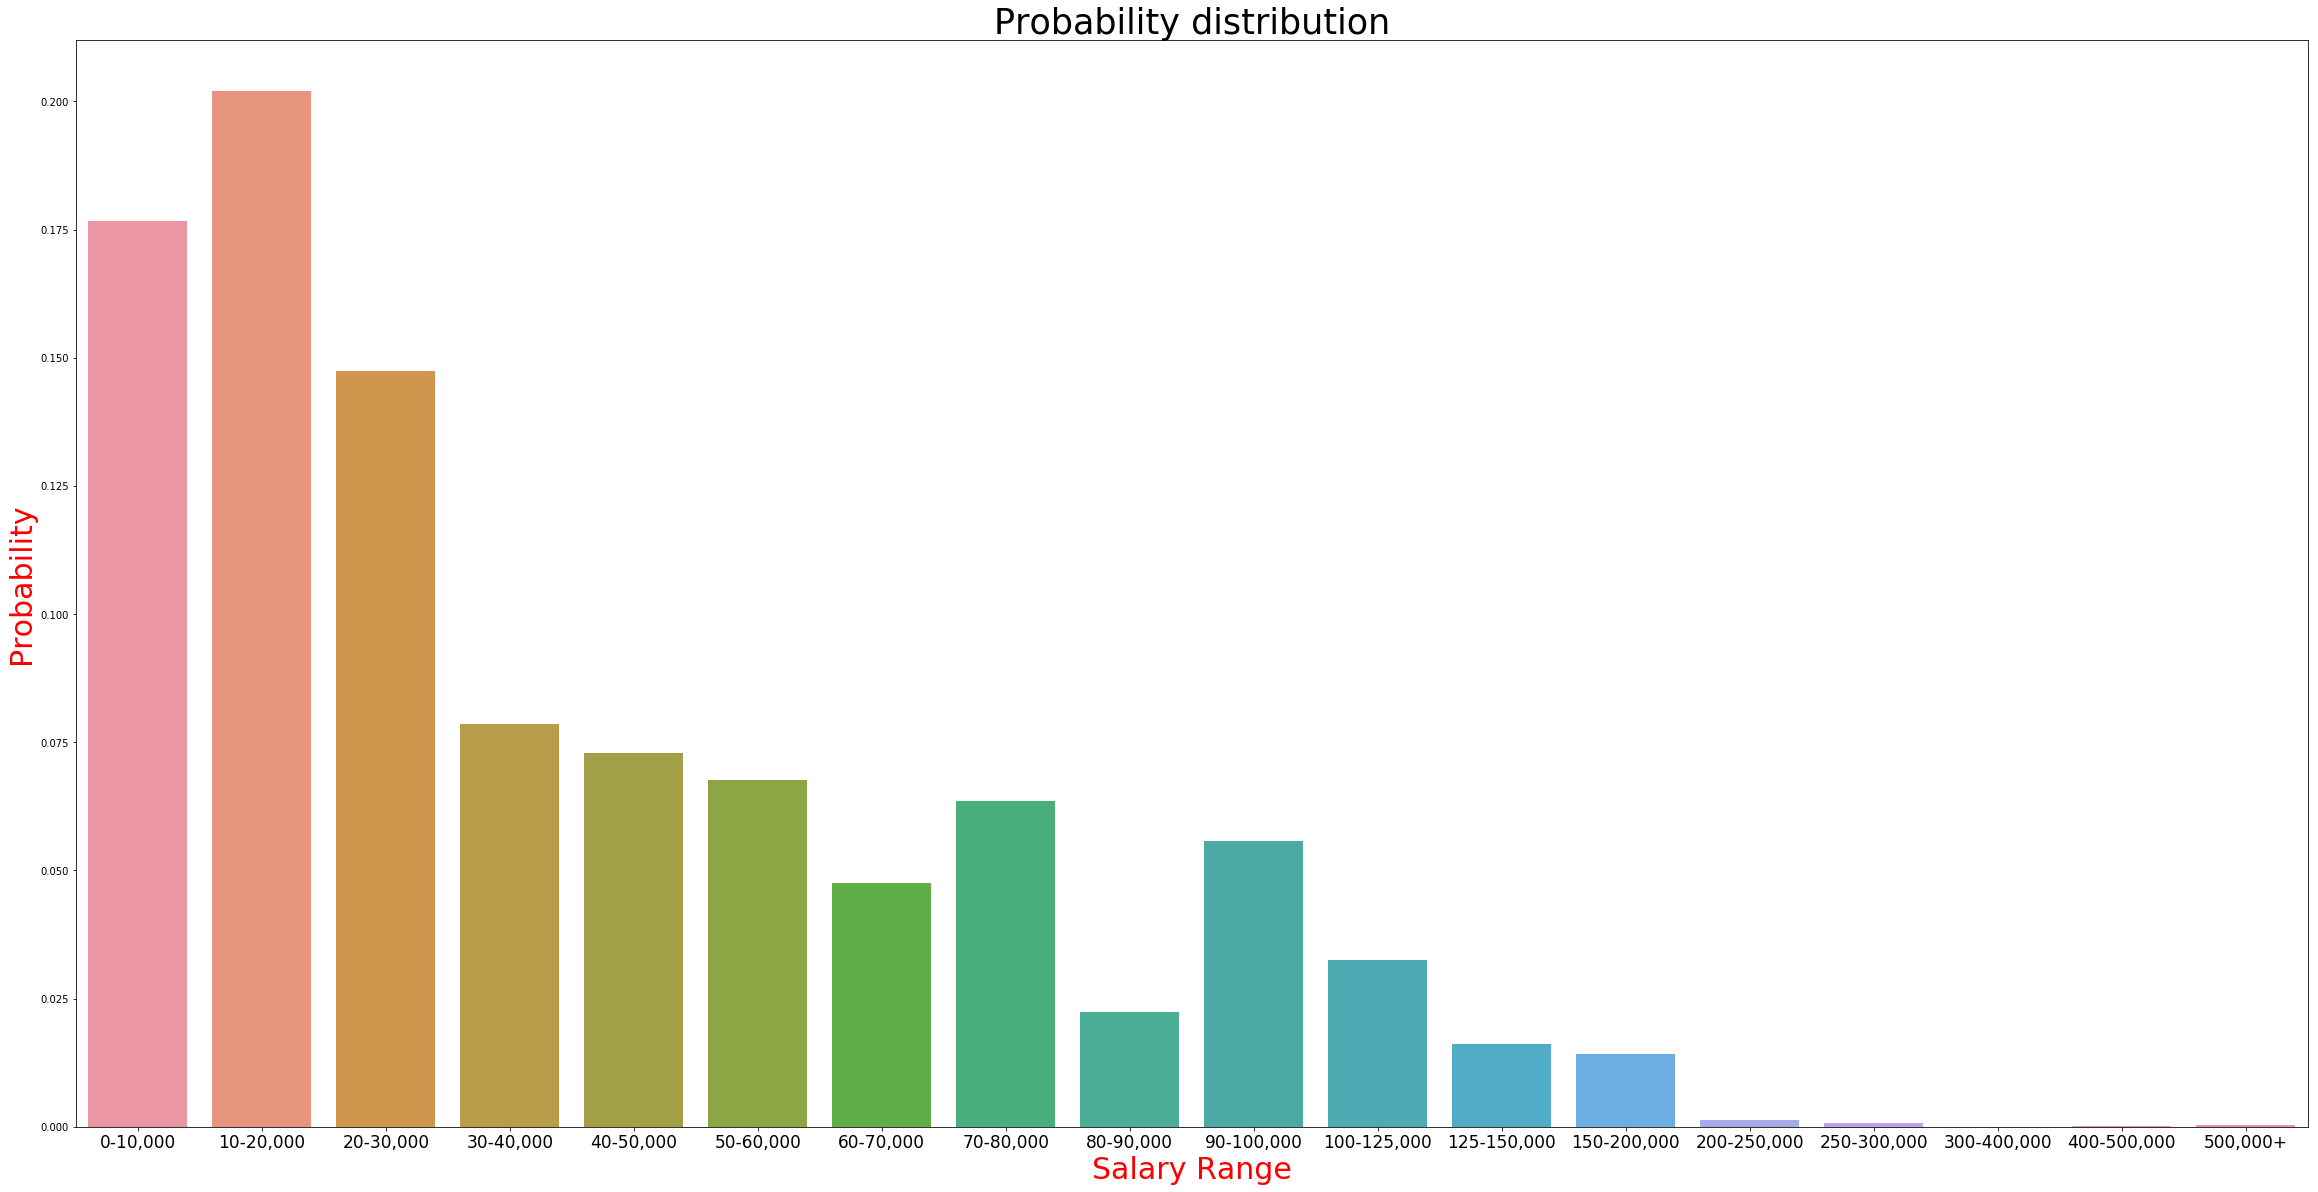

In [152]:
print("His actual Salary Range is =",y_test.iloc[49])
prob_hist_test(49)

print("We can see from the histogram that he has the highest probability for his salary  lies in 10-20,000k range = 0.24 ")


### In this case the model is not doing so well it predicts the highest probability for the range of salary =10-20,000k. But the 50th persons actual salary lies in range of 40-50,000k

### We can conclude from above histograms that out model is doing pretty well for lower classes such as 0-10,000k,10-20,000k. We will evaulate this fact by calculating precision recall and f1 scores for these classes.

## Testing Scores on Test Set
### Calculation of Precision, Recall, F1 Score for major classes
### Confusion Matrix

A confusion matrix is a summary of prediction results on a classification problem.
The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.
The confusion matrix shows the ways in which your classification model is confused when it makes predictions.
It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

In [153]:
confusion_matrix(y_test,predictions_test)
l=['0-10,000','10-20,000','20-30,000','30-40,000','40-50,000','50-60,000',
                  '60-70,000','70-80,000','80-90,000','90-100,000','100-125,000','125-150,000',
                  '150-200,000','200-250,000','250-300,000','300-400,000','400-500,000','500,000+']

In [154]:
matrix=confusion_matrix(y_test,predictions_test)
conf_df=pd.DataFrame(matrix,columns=l, index=l)
                  
conf_df

,"0-10,000","10-20,000","20-30,000","30-40,000","40-50,000","50-60,000","60-70,000","70-80,000","80-90,000","90-100,000","100-125,000","125-150,000","150-200,000","200-250,000","250-300,000","300-400,000","400-500,000","500,000+"
"0-10,000",261,27,9,8,4,5,1,2,1,0,4,2,1,0,0,0,0,0
"10-20,000",142,49,28,18,11,14,1,1,1,1,5,0,1,0,0,0,0,0
"20-30,000",82,49,26,13,10,11,4,4,0,1,5,1,1,0,0,0,0,0
"30-40,000",48,43,15,15,12,11,3,0,0,1,8,2,2,0,0,0,0,0
"40-50,000",57,32,19,24,14,17,6,4,0,0,8,2,1,0,0,0,0,0
"50-60,000",43,21,17,15,7,14,5,0,4,0,7,3,0,1,0,0,0,1
"60-70,000",31,20,16,16,11,7,2,1,1,1,11,8,1,0,0,0,0,0
"70-80,000",32,11,9,8,11,14,2,1,0,3,12,13,2,0,0,0,0,0
"80-90,000",10,8,6,12,5,4,2,2,1,5,14,5,5,0,0,0,0,0
"90-100,000",13,16,9,11,4,9,4,1,0,2,24,7,2,0,0,0,0,0


### Precision, Recall, F1 Score 

#### For Class 0-10,000k

In [155]:
TP=conf_df.iloc[0,0]
FN=conf_df.iloc[0,1:].sum()
FP=conf_df.iloc[1:,0].sum()

Recall_10k=TP/(TP+FN)
Precision_10k=TP/(TP+FP)

print("Recall for 0-10,00k =",Recall_10k)
print("Precision for 0-10,00k =",Precision_10k)

F1_score=(2*(Recall_10k)*(Precision_10k))/(Precision_10k + Recall_10k)

print("F1 Score for class 0-10,000k = ",F1_score)

Recall for 0-10,00k = 0.803076923076923
Precision for 0-10,00k = 0.34432717678100266
F1 Score for class 0-10,000k =  0.481994459833795


### We can see Our Model is doing pretty well for 0-10,000k class.
### It gives good value of  recall as well as F1 score

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. .

So,Suppose we make 100 predictions for class 0-10,000k, out of that around 34 predictions are correct. This why precision is also very important.

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. It is that out of the total actual number of 0-10,000k classes how much the model is predicting correctly.
For our case it is predicting approximatelly 80% correctly which is a very good score.

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.456

F1 Score = 2*(Recall * Precision) / (Recall + Precision)



#### For Class 10-20,000k

In [156]:
TP=conf_df.iloc[1,1]
SumTP_FN=conf_df.iloc[1,:].sum()
SumTP_FP=conf_df.iloc[:,1].sum()

Recall_20k=TP/SumTP_FN
Precision_20k=TP/SumTP_FP

print("Recall for 10-20,00k =",Recall_20k)
print("Precision for 10-20,00k =",Precision_20k)

F1_score=(2*(Recall_20k)*(Precision_20k))/(Precision_20k + Recall_20k)

print("F1 Score for class 10-20,000k = ",F1_score)







Recall for 10-20,00k = 0.1801470588235294
Precision for 10-20,00k = 0.15705128205128205
F1 Score for class 10-20,000k =  0.16780821917808217


### But, Our Model is not doing so well for 10-20,000k Class 


## Over All Accuracy

#### Accuracy = [(TP+TN)/(TP+TN+FP+FN)]

In [157]:
# Here x is actually TP+TN. Obtained by taking trace of confusion matrix
x=np.trace(matrix)

# Here y is actually TP+TN+FP+FN. Obtained by taking summ of all the elements of the confusion matrix
y=np.sum(matrix)

Accuracy=x/y

print("Accuracy on test set calculated by Confusion Matrix is=",Accuracy*100)

print("Accuracy on test set calculated by accuracy_score method is=",100*accuracy_score(y_test,predictions_test))

      

Accuracy on test set calculated by Confusion Matrix is= 21.48566055477198
Accuracy on test set calculated by accuracy_score method is= 21.48566055477198


We can see that both are accuracies are exactly same , beacuse accuracy_score function from scikit learn uses the same methodolgy of find accuracy. It takes the trace of the confusion matrix and divides it by summ of total matrix. Since, we can see our Model is not performing so well so we will go for hyperparameter tuning of the model to find the best value of parameters.


## 5- Model Tuning
### Hyperparameter Tuning

For the case of cross validation hyperparameter tuning my model is yielding the similar results and the compution time goes to 1hr. Hence, i have used the hyperparameter tuning using simple logistic regression model
The code for the hyperparameter tuning using crossvalidation is given below along with its result.

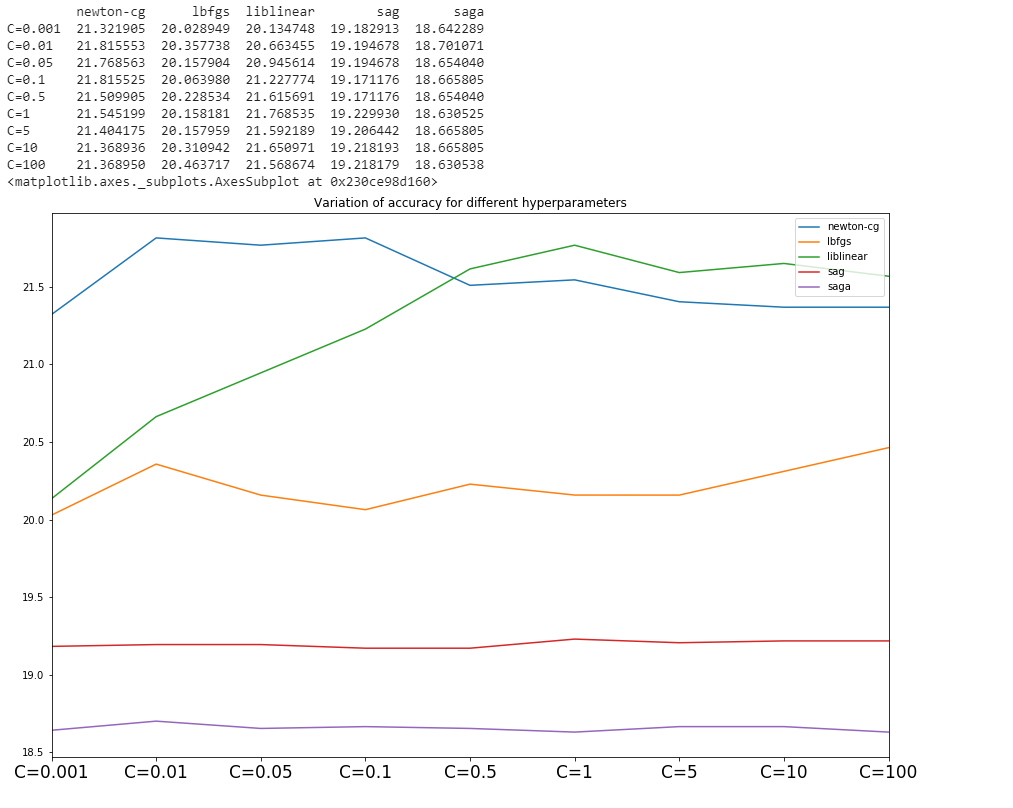

In [158]:
from IPython.display import Image
Image(filename='Capture.png')
#This takes around 45 minutes to run.
#kfold = KFold(n_splits=10)
#accuracies=[]
#for C in  [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
 #   for solver in ['newton-cg','lbfgs','liblinear','sag','saga']:
  #      results = cross_val_score(LogisticRegression(C=C,solver=solver), features,new_salaries.Salary, cv=kfold)
   #     print("For C=",C,"solver=",solver)
    #    print("Mean Accuracy is=",results.mean())
     #   accuracies.append(results.mean())


### Hyperparamater Tuning Using Logistic Regression: Grid Search

Hyperparameters are hugely important in getting good performance with models. In order to understand this process, we first need to understand the difference between a model parameter and a model hyperparameter.

Model parameters are internal to the model whose values can be estimated from the data and we are often trying to estimate them as best as possible . whereas hyperparameters are external to our model and cannot be directly learned from the regular training process. These parameters express “higher-level” properties of the model such as its complexity or how fast it should learn. Hyperparameters are model-specific properties that are ‘fixed’ before you even train and test your model on data.

For, finding the optimum value of hyperparameter I varied two hyperparameters C and solver.
For different combinations of C value and solver, I computed Precision, Recall, F1-Score and Accuracy for all the possible combinations and plotted their variation in a graph. Then I selected the combination of hyperparameters. which gave best of these scores. 

In [159]:
#This takes around 10 minutes to run.
kfold = KFold(n_splits=10)
accuracies=[]
Precision=[]
Recall=[]
F1score=[]

for C in  [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag','saga']:
        
        lr=LogisticRegression(C=C,solver=solver)
        lr.fit(X_train,y_train)
        y_test_predict=lr.predict(X_test)
        
        #Since we have 18 classes 
        #creating a confusion matrix of 18X18 .
        
        matrix1=confusion_matrix(y_test,y_test_predict)
        confmatrix_df=pd.DataFrame(matrix1,columns=l, index=l)
        
        # we are calculation precision,recall everything for 0-10,000k 
        # For class 0-10,000k we are calculating TP,FP,FN by traversing in the matrix 
        ## as done in the Model Implementation section for 1 Hyperparameter
        
        TP=confmatrix_df.iloc[0,0]
        FN=confmatrix_df.iloc[0,1:].sum()
        FP=confmatrix_df.iloc[1:,0].sum()
        
        ## Compuiting and Storing all the values for precision in a list for all sets of hyperparameters
        precision=(TP/(TP+FP))
        Precision.append(precision)
         
        ## Computing and storing all the values for recall in a list for all sets of hyperparameters
        recall=((TP)/(TP+FN))
        Recall.append(recall)
        
         ## Computing and Storing all the values forF1-score in a list for all sets of hyperparameters
        F1_score=((2*(recall)*(precision))/(precision + recall))
        F1score.append(F1_score)
       
       ## Computing and Storing all the values for accuracies in a list for all sets of hyperparameters
        accuracy=accuracy_score(y_test,y_test_predict)
        accuracies.append(accuracy)
        
        print("For C=",C,"Solver=",solver)
        print("precision=",precision)
        print("recall",recall)
        print("Accuracy=",accuracy)
        print("F1_score=",F1_score)

For C= 0.001 Solver= newton-cg
precision= 0.3088718510405257
recall 0.8676923076923077
Accuracy= 0.22755054066760697
F1_score= 0.455573505654281
For C= 0.001 Solver= lbfgs
precision= 0.29758149316508936
recall 0.8707692307692307
Accuracy= 0.20968500235072873
F1_score= 0.4435736677115988
For C= 0.001 Solver= liblinear
precision= 0.2893923789907312
recall 0.8646153846153846
Accuracy= 0.20827456511518572
F1_score= 0.43364197530864207
For C= 0.001 Solver= sag
precision= 0.2437603993344426
recall 0.9015384615384615
Accuracy= 0.19840150446638458
F1_score= 0.38375900458415196
For C= 0.001 Solver= saga
precision= 0.23515248796147672
recall 0.9015384615384615
Accuracy= 0.1918194640338505
F1_score= 0.3730108211330363
For C= 0.01 Solver= newton-cg
precision= 0.33170731707317075
recall 0.8369230769230769
Accuracy= 0.21908791725434884
F1_score= 0.4751091703056768
For C= 0.01 Solver= lbfgs
precision= 0.30619266055045874
recall 0.8215384615384616
Accuracy= 0.21156558533145275
F1_score= 0.446115288220

### Comparision of Models for different Hyperparameters

### How Precision for class 0-10,000k is varying for different hyperparameters?

         newton-cg      lbfgs  liblinear        sag       saga
C=0.001  30.887185  29.758149  28.939238  24.376040  23.515249
C=0.01   33.170732  30.619266  31.721698  24.579125  23.586430
C=0.05   33.881163  30.941176  33.124216  24.620573  23.629032
C=0.1    33.761232  31.452581  33.204633  24.579125  23.572003
C=0.5    34.251969  31.189320  34.569536  24.620573  23.590982
C=1      34.432718  31.623932  34.090909  24.558452  23.553055
C=5      33.992095  31.445783  34.354194  24.599832  23.567393
C=10     33.949802  30.924171  34.362416  24.599832  23.609992
C=100    33.949802  31.372549  34.175532  24.599832  23.586430


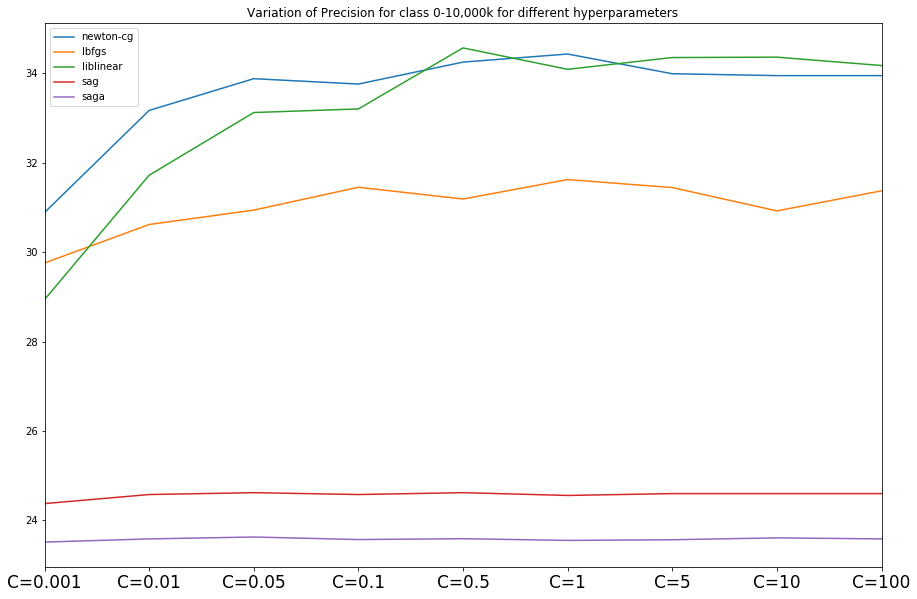

In [160]:

listp=[]
for i in range (0,len(Precision),5):
    listp.append((Precision[i:i+5]))
    
C1=listp[0]
C2=listp[1]
C3=listp[2]
C4=listp[3]
C5=listp[4]
C6=listp[5]
C7=listp[6]
C8=listp[7]
C9=listp[8]


precisions_df=pd.DataFrame([C1,C2,C3,C4,C5,C6,C7,C8,C9],columns=['newton-cg','lbfgs','liblinear','sag','saga'],
                                                 index=["C=0.001","C=0.01","C=0.05","C=0.1","C=0.5","C=1","C=5","C=10","C=100"])


precisions_df=100*precisions_df
print(precisions_df)
precisions_df.plot(figsize=(15,10),title="Variation of Precision for class 0-10,000k for different hyperparameters")

### How Recall for class 0-10,000k is varying for different hyperparameters?

         newton-cg      lbfgs  liblinear        sag       saga
C=0.001  86.769231  87.076923  86.461538  90.153846  90.153846
C=0.01   83.692308  82.153846  82.769231  89.846154  89.846154
C=0.05   82.461538  80.923077  81.230769  89.846154  90.153846
C=0.1    80.923077  80.615385  79.384615  89.846154  90.153846
C=0.5    80.307692  79.076923  80.307692  89.846154  90.153846
C=1      80.307692  79.692308  78.461538  89.846154  90.153846
C=5      79.384615  80.307692  79.384615  89.846154  89.846154
C=10     79.076923  80.307692  78.769231  89.846154  90.153846
C=100    79.076923  78.769231  79.076923  89.846154  89.846154


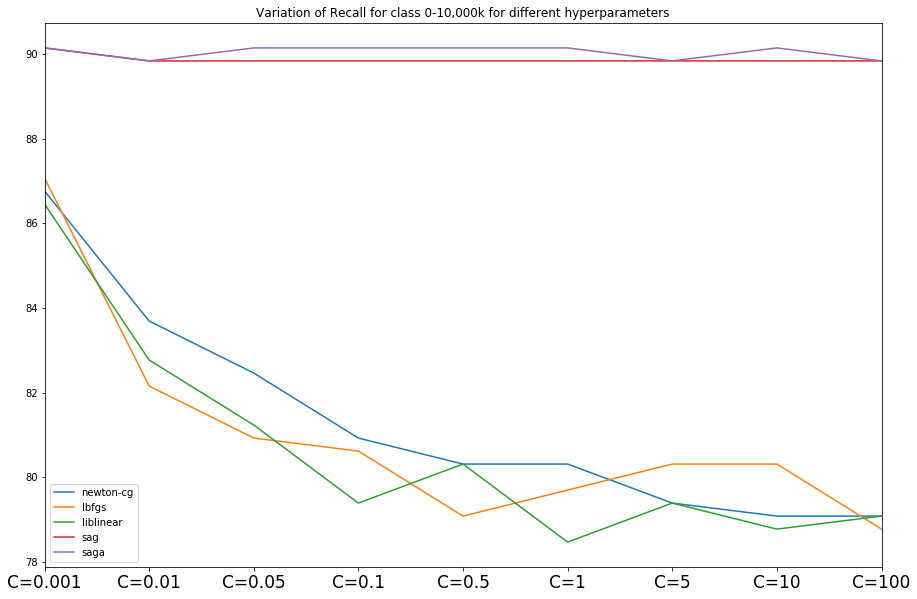

In [161]:
listr=[]
for i in range (0,len(Recall),5):
    listr.append((Recall[i:i+5]))
    
C1=listr[0]
C2=listr[1]
C3=listr[2]
C4=listr[3]
C5=listr[4]
C6=listr[5]
C7=listr[6]
C8=listr[7]
C9=listr[8]


recalls_df=pd.DataFrame([C1,C2,C3,C4,C5,C6,C7,C8,C9],columns=['newton-cg','lbfgs','liblinear','sag','saga'],
                                                 index=["C=0.001","C=0.01","C=0.05","C=0.1","C=0.5","C=1","C=5","C=10","C=100"])


recalls_df=100*recalls_df
print(recalls_df)
recalls_df.plot(figsize=(15,10),title="Variation of Recall for class 0-10,000k for different hyperparameters")

### How F1-Score for class 0-10,000k is varying for different hyperparameters?

         newton-cg      lbfgs  liblinear        sag       saga
C=0.001  45.557351  44.357367  43.364198  38.375900  37.301082
C=0.01   47.510917  44.611529  45.865303  38.598810  37.364044
C=0.05   48.028674  44.765957  47.058824  38.649901  37.444089
C=0.1    47.644928  45.250432  46.823956  38.598810  37.372449
C=0.5    48.022079  44.734552  48.333333  38.649901  37.396299
C=1      48.199446  45.279720  47.530289  38.573316  37.348630
C=5      47.601476  45.194805  47.955390  38.624339  37.340153
C=10     47.504621  44.653550  47.850467  38.624339  37.420179
C=100    47.504621  44.872918  47.725162  38.624339  37.364044


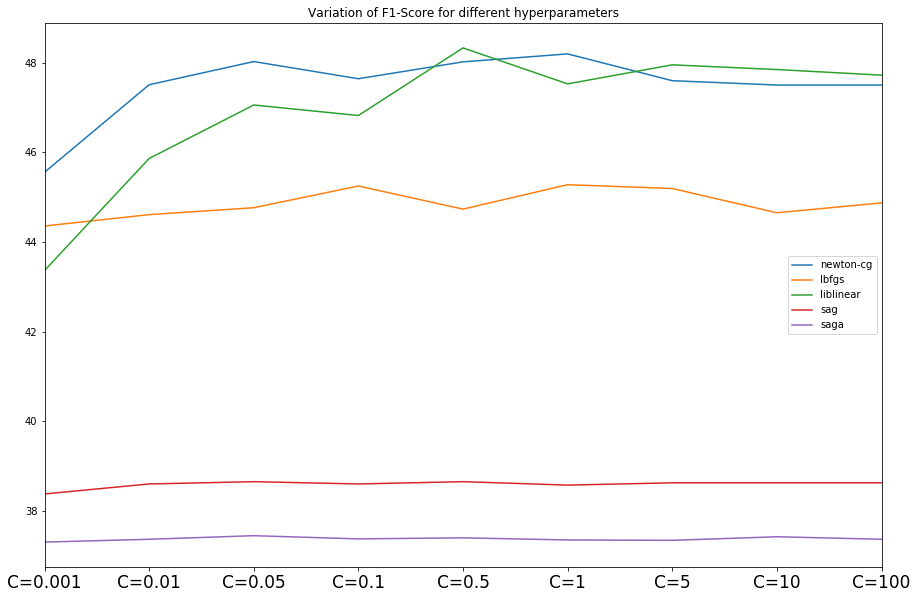

In [162]:
listf1=[]
for i in range (0,len(F1score),5):
    listf1.append((F1score[i:i+5]))
    
C1=listf1[0]
C2=listf1[1]
C3=listf1[2]
C4=listf1[3]
C5=listf1[4]
C6=listf1[5]
C7=listf1[6]
C8=listf1[7]
C9=listf1[8]


f1scores_df=pd.DataFrame([C1,C2,C3,C4,C5,C6,C7,C8,C9],columns=['newton-cg','lbfgs','liblinear','sag','saga'],
                                                 index=["C=0.001","C=0.01","C=0.05","C=0.1","C=0.5","C=1","C=5","C=10","C=100"])


f1scores_df=100*f1scores_df
print(f1scores_df)
f1scores_df.plot(figsize=(15,10),title="Variation of F1-Score for different hyperparameters")

         newton-cg      lbfgs  liblinear        sag       saga
C=0.001  22.755054  20.968500  20.827457  19.840150  19.181946
C=0.01   21.908792  21.156559  21.485661  19.934180  19.181946
C=0.05   21.814763  21.391631  21.673719  19.981194  19.275976
C=0.1    21.579690  21.438646  21.861777  20.028209  19.275976
C=0.5    21.626704  20.874471  21.861777  20.075223  19.275976
C=1      21.485661  21.062529  21.297602  19.934180  19.322990
C=5      21.297602  21.485661  21.250588  20.028209  19.228961
C=10     21.391631  21.814763  21.344617  20.075223  19.228961
C=100    21.344617  21.344617  21.438646  20.075223  19.275976


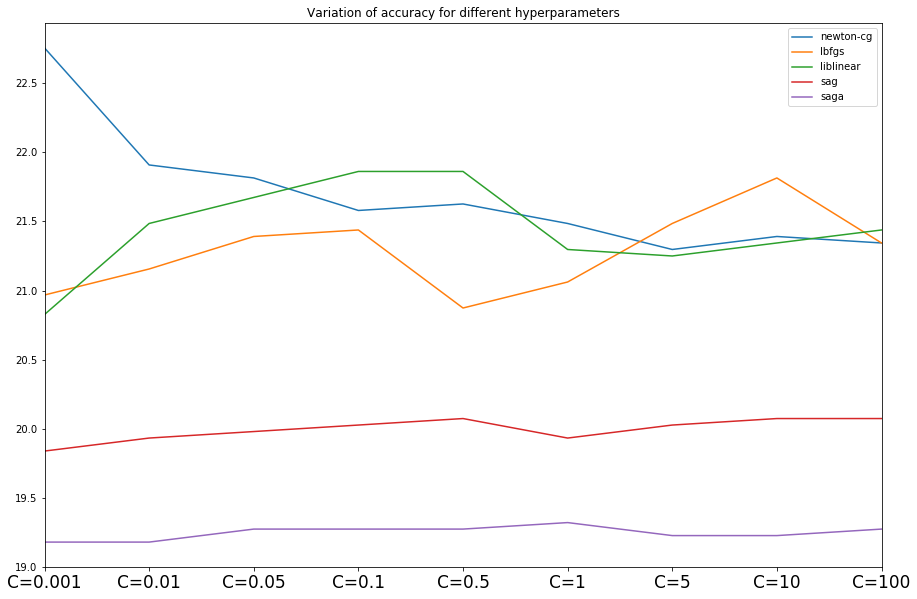

In [163]:
lista=[]
for i in range (0,len(accuracies),5):
    lista.append((accuracies[i:i+5]))
    
C1=lista[0]
C2=lista[1]
C3=lista[2]
C4=lista[3]
C5=lista[4]
C6=lista[5]
C7=lista[6]
C8=lista[7]
C9=lista[8]


accuracy_df=pd.DataFrame([C1,C2,C3,C4,C5,C6,C7,C8,C9],columns=['newton-cg','lbfgs','liblinear','sag','saga'],
                                                 index=["C=0.001","C=0.01","C=0.05","C=0.1","C=0.5","C=1","C=5","C=10","C=100"])


accuracy_df=100*accuracy_df
print(accuracy_df)
accuracy_df.plot(figsize=(15,10),title="Variation of accuracy for different hyperparameters")


 Over-here, I would chose the most important criterion to be F1-Score and Accuracy to get the best hyperparameters.
 Based upon that we can make certain conclusions-

#### We can see from the above plot that best accuracy is yield for C=0.001 solver as newton-cg. 

#### We can see from the above plot that best F1-Score is yield for C=0.05 solver as newton-cg

#### Hence, we will chose C=0.001 or 0.05 and newnton-cg SOLVER for our classification model to get best results.
But since Accuracy gives the overall accuracy for the model comparing all the classes so i think Accuracy would be a better criterion to judge the model. Whereas, On the other hand, F1-Score and Recall for this class 0-10,00k is good but it may not be good for all the classes at the same time. 
Actually it is very bad for other classes if we compute with the confusion matrix. 
Hence, Accuracy would be the best criterion to judge our Model.

But, for value of C=0.001 the training and test scores seem to get very close to each other with increasing complexity as found towards the end of results. Which leads to high bias. Hence, i opted for second best value of C=0.05

### SO, C=0.05 will be chosen as best Hyperparameter with Solver = newton-cg

## 6- Model Testing and Discussion

#### Function created for finding the Learnig curve for training and test set

In [164]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(15,10))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="g",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b", label="Test Set")
    plt.legend(loc="best")
    
    return plt

### Testing with the Best Hyperparameters on Test set

In [196]:
l=LogisticRegression(C=0.05,solver="newton-cg",multi_class="ovr")

In [197]:
l.fit(X_train,y_train)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [198]:
pred_final_train=l.predict(X_train)
pred_final_test=l.predict(X_test)

In [200]:
Accuracy= round((100*accuracy_score(y_train,pred_final_train)))
print("Accuracy on the train set for the best hyperparameters is =", Accuracy,"%")

Accuracy on the train set for the best hyperparameters is = 25.0 %


In [201]:
Accuracy= round((100*accuracy_score(y_test,pred_final_test)))
print("Accuracy on the test set for the best hyperparameters is =", Accuracy,"%")

Accuracy on the test set for the best hyperparameters is = 22.0 %


plot_learning_curve() uses in turn the function sklearn.learning_curve.learning_curve(), which determines cross-validated training and test scores for different training set sizes. An (optional) cross-validation generator splits the given dataset k times in training and test data. (The default is 3-fold cross validation.) Subsets of the training set with varying sizes will be used to train the estimator and a score for each training subset size and the test set will be computed. The scores are averaged over all k runs for each training subset size.

### Distribution

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

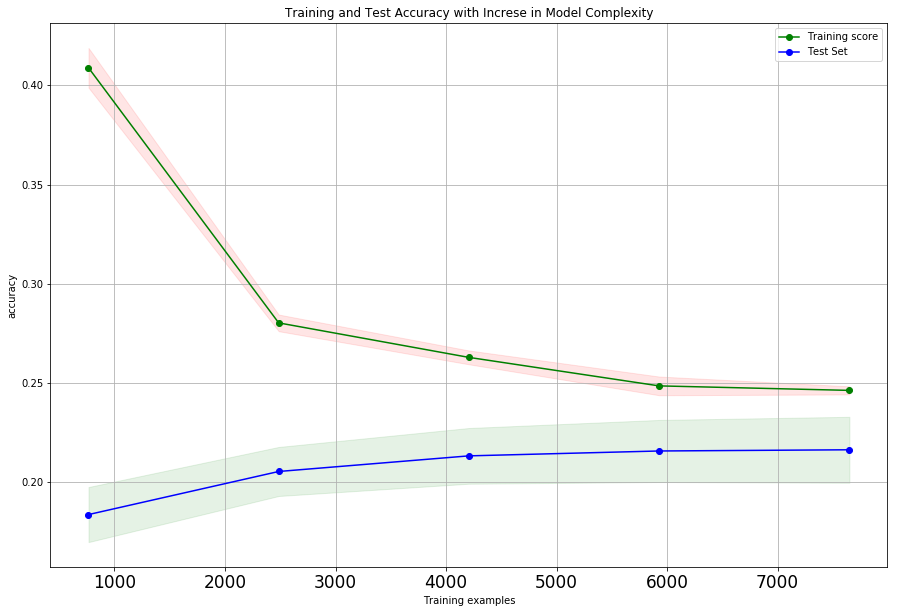

In [202]:

plot_learning_curve(l,'Training and Test Accuracy with Increse in Model Complexity', features, new_salaries.Salary, cv=10)

### Learning Curve
The shape and dynamics of a learning curve can be used to diagnose the behavior of a machine learning model
and in turn perhaps suggest at the type of configuration changes that 
may be made to improve learning and/or performance.

So, if two curves are "very close to each other" and both of them but have a low score. The model suffer from an under fitting problem (High Bias)

If training curve has a much better score but testing curve has a lower score, i.e., there are large gaps between two curves. Then the model suffer from an over fitting problem (High Variance)

### Overfitting , Underfitting and Fitting
So, basically if the gap is too large model has very high Variance and if the gap is too small model has very high bias.
But for our case the gap is optimum and after certain threshold for the complexity of the model the lines are becoming parallel to ecah other.This signifies that our model is neither underfit nor overfit. It is fit. 


### Ways to Increase Accuracy
We still have a lot of scope to increse the accuracy of the model-

1- Optimize other scores - I  can optimize on other metrics also such as Log Loss and F1-Score for multiple classes at the same time. The F1-Score could be useful, in case of class imbalance. This iwil be a  good guide that talks more about scoring.

2-We can have more thinking about the features which have to be be label encoded or one hot-encoded. Varaiation in these small thing can boost the accuracy of the model.

3-We can have feature selection using different models like ANNOVA, RIdge, ELASTIC models.

4- PCA- We could also go for a Principal Component Analysis which can help in dimensionality reduction, hence appropriate feature selection leading to increse in accuracy of the model.

5- Error Analysis- For each of my models, going  back and looking at the cases where they are failing. I might end up finding that some of my models work well on one part of the parameter space while others work better on other parts. 

6- Hyperparameter Tuning–Grid Search  
  I can do grid search for tuning by taking permutation combinations for more parameters- for more parameters-C,Solver,Penalty,   max_iterations, Multiclass  solver.

7- While doing this hyperparameter tuning i can increse the number of folds to 20 with these 4 sets of parameters with 4 loops.
But of this computation time can go upto 3hrs.


